## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


## Data Extraction and Loading

In [2]:
# Connect to the database
conn = sq.connect('accident_data_v1.0.0_2023.db')

# Create a cursor object
cursor = conn.cursor()

# Execute a query to retrieve the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Loop through the tables and create DataFrames with variable names based on table names
for table in tables:
    table_name = table[0]
    globals()[table_name] = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Close the connection
conn.close()

In [3]:
tables

[('accident',), ('casualty',), ('vehicle',), ('lsoa',)]

In [4]:
accident = accident[accident['accident_year'] == 2020]
vehicle = vehicle[vehicle['accident_year'] == 2020]
casualty = casualty[casualty['accident_year'] == 2020]



In [5]:
accident.head()

accident_index  accident_year accident_reference  \
370153  2020010219808           2020          010219808   
370154  2020010220496           2020          010220496   
370155  2020010228005           2020          010228005   
370156  2020010228006           2020          010228006   
370157  2020010228011           2020          010228011   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
370153               521389.0                175144.0  -0.254001  51.462262   
370154               529337.0                176237.0  -0.139253  51.470327   
370155               526432.0                182761.0  -0.178719  51.529614   
370156               538676.0                184371.0  -0.001683  51.541210   
370157               529324.0                181286.0  -0.137592  51.515704   

        police_force  accident_severity  number_of_vehicles  ...  \
370153             1                  3                   1  ...   
370154             1                  3                   1  ...   
370155             1                  3                   1  ...   
370156             1                  2                   1  ...   
370157             1                  3                   1  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
370153                                        9                1   
370154                                        4                1   
370155                                        0                4   
370156                                        4                4   
370157                                        0                4   

        weather_conditions road_surface_conditions  \
370153                   9                       9   
370154                   1                       1   
370155                   1                       2   
370156                   1                       1   
370157                   1                       1   

        special_conditions_at_site carriageway_hazards urban_or_rural_area  \
370153                           0                   0                   1   
370154                           0                   0                   1   
370155                           0                   0                   1   
370156                           0                   0                   1   
370157                           0                   0                   1   

        did_police_officer_attend_scene_of_accident  trunk_road_flag  \
370153                                            3                2   
370154                                            1                2   
370155                                            1                2   
370156                                            1                2   
370157                                            1                2   

        lsoa_of_accident_location  
370153                  E01004576  
370154                  E01003034  
370155                  E01004726  
370156                  E01003617  
370157                  E01004763  

[5 rows x 36 columns]

In [6]:
casualty.head()

casualty_index accident_index  accident_year accident_reference  \
484748          484748  2020010219808           2020          010219808   
484749          484749  2020010220496           2020          010220496   
484750          484750  2020010220496           2020          010220496   
484751          484751  2020010228005           2020          010228005   
484752          484752  2020010228006           2020          010228006   

        vehicle_reference  casualty_reference  casualty_class  \
484748                  1                   1               3   
484749                  1                   1               3   
484750                  1                   2               3   
484751                  1                   1               3   
484752                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
484748                1               31                     6   
484749                2                2                     1   
484750                2                4                     1   
484751                1               23                     5   
484752                1               47                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
484748                  3                    9                    5   
484749                  3                    1                    1   
484750                  3                    1                    1   
484751                  3                    5                    9   
484752                  2                    4                    1   

        car_passenger  bus_or_coach_passenger  \
484748              0                       0   
484749              0                       0   
484750              0                       0   
484751              0                       0   
484752              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
484748                                   0              0   
484749                                   0              0   
484750                                   0              0   
484751                                   0              0   
484752                                   0              0   

        casualty_home_area_type  casualty_imd_decile  
484748                        1                    4  
484749                        1                    2  
484750                        1                    2  
484751                        1                    3  
484752                        1                    3

In [7]:
vehicle.head()

vehicle_index accident_index  accident_year accident_reference  \
681716         681716  2020010219808           2020          010219808   
681717         681717  2020010220496           2020          010220496   
681718         681718  2020010228005           2020          010228005   
681719         681719  2020010228006           2020          010228006   
681720         681720  2020010228011           2020          010228011   

        vehicle_reference  vehicle_type  towing_and_articulation  \
681716                  1             9                        9   
681717                  1             9                        0   
681718                  1             9                        0   
681719                  1             8                        0   
681720                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
681716                  5                       1                     5  ...   
681717                  4                       2                     6  ...   
681718                 18                      -1                    -1  ...   
681719                 18                       1                     5  ...   
681720                 18                       3                     7  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
681716                          6              2             32   
681717                          2              1             45   
681718                          6              3             -1   
681719                          1              1             44   
681720                          6              1             20   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
681716                   6                1968                2   
681717                   7                1395                1   
681718                  -1                  -1               -1   
681719                   7                1798                8   
681720                   4                2993                2   

        age_of_vehicle  generic_make_model  driver_imd_decile  \
681716               6             AUDI Q5                  4   
681717               2             AUDI A1                  7   
681718              -1                  -1                 -1   
681719               8        TOYOTA PRIUS                  2   
681720               4        BMW 4 SERIES                 -1   

        driver_home_area_type  
681716                      1  
681717                      1  
681718                     -1  
681719                      1  
681720                     -1  

[5 rows x 28 columns]

In [8]:
lsoa.head()

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

## Data Cleaning and Preprocessing

In [9]:
for i in tables:
    print(f"{i[0]} Data Rows is {len(globals()[i[0]])}")

accident Data Rows is 91199
casualty Data Rows is 115584
vehicle Data Rows is 167375
lsoa Data Rows is 34378


In [10]:
# Merge accident and vehicles DataFrames
accident_vehicles = pd.merge(accident, vehicle, on='accident_index')

# Merge the result with casualty DataFrame
df = pd.merge(accident_vehicles, casualty, on='accident_index')

df = pd.merge(df, lsoa, right_on = 'lsoa01cd', left_on= 'lsoa_of_accident_location')

df.head()

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2020010219808             2020            010219808               521389.0   
1  2020010220496             2020            010220496               529337.0   
2  2020010220496             2020            010220496               529337.0   
3  2020010228005             2020            010228005               526432.0   
4  2020010228006             2020            010228006               538676.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                176237.0  -0.139253  51.470327             1   
3                182761.0  -0.178719  51.529614             1   
4                184371.0  -0.001683  51.541210             1   

   accident_severity  number_of_vehicles  ...  casualty_type  \
0                  3                   1  ...              0   
1                  3                   1  ...              0   
2                  3                   1  ...              0   
3                  3                   1  ...              0   
4                  2                   1  ...              0   

  casualty_home_area_type  casualty_imd_decile objectid   lsoa01cd  \
0                       1                    4     4576  E01004576   
1                       1                    2     3034  E01003034   
2                       1                    2     3034  E01003034   
3                       1                    3     4726  E01004726   
4                       1                    3     3617  E01003617   

           lsoa01nm         lsoa01nmw    shape__area  shape__length  \
0   Wandsworth 013D   Wandsworth 013D  445625.061623    4486.701130   
1      Lambeth 012A      Lambeth 012A  114698.446686    1719.140860   
2      Lambeth 012A      Lambeth 012A  114698.446686    1719.140860   
3  Westminster 003C  Westminster 003C  185726.854301    2698.692831   
4       Newham 012B       Newham 012B  232690.613373    3013.438191   

                               globalid  
0  c7ddebfb-d730-4be6-b67e-938adb21309e  
1  cb2e7f50-252f-469e-9b13-a56794f5d5d6  
2  cb2e7f50-252f-469e-9b13-a56794f5d5d6  
3  e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18  
4  3e1979c9-8863-4982-afa5-7a6de00635d7  

[5 rows x 88 columns]

In [11]:
len(df)

201943

In [12]:
df['lsoa_of_accident_location'].value_counts()

lsoa_of_accident_location
E01016012    166
E01023722    128
E01004736    123
E01026070    121
E01002444    120
            ... 
E01003692      1
E01029747      1
E01029756      1
E01000312      1
E01008472      1
Name: count, Length: 24980, dtype: int64

In [13]:
print(df['accident_reference_x'].equals(df['accident_reference']))
print(df['accident_reference_x'].equals(df['accident_reference_y']))
print(df['accident_reference_y'].equals(df['accident_reference']))


True
True
True


In [14]:
print(df['accident_year_x'].equals(df['accident_year']))
print(df['accident_year_x'].equals(df['accident_year_y']))
print(df['accident_year_y'].equals(df['accident_year']))

True
True
True


In [15]:
df = df.drop(['accident_reference_x', 'accident_reference_y', 'accident_year_y', 'accident_year_x'], axis =1)

In [16]:
print(df['vehicle_reference_x'].equals(df['vehicle_reference_y']))


False


In [17]:
df[df['vehicle_reference_y'] != df['vehicle_reference_x']][['vehicle_reference_x', 'vehicle_reference_y']]

vehicle_reference_x  vehicle_reference_y
9                         2                    1
11                        2                    1
13                        2                    1
15                        2                    1
19                        1                    2
...                     ...                  ...
201937                    4                    1
201938                    4                    2
201939                    4                    2
201940                    4                    2
201941                    4                    2

[96477 rows x 2 columns]

In [18]:
df['vehicle_reference_x'].nunique()

14

In [19]:
df['vehicle_reference_y'].nunique()

12

In [20]:
vehicle['vehicle_reference'].nunique()

14

In [21]:
casualty['vehicle_reference'].nunique()

12

In [22]:
df.rename(columns={'vehicle_reference_x': 'vehicle_reference', 'vehicle_reference_y': 'casualty_vehicle_reference'}, inplace=True)

In [23]:
# Calculate the number of null values in each column
null_counts = accident.isnull().sum()

# Filter columns that have more than 0 null values
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls = [i for i, j in columns_with_nulls.items()]
# Display the columns with their null counts
print(columns_with_nulls)

['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']


In [24]:
for i in columns_with_nulls:
    df[i] = df[i].fillna(df[i].mean())

In [25]:
for i in columns_with_nulls:
    accident[i] = accident[i].fillna(accident[i].mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201943 entries, 0 to 201942
Data columns (total 84 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               201943 non-null  object 
 1   location_easting_osgr                        201943 non-null  float64
 2   location_northing_osgr                       201943 non-null  float64
 3   longitude                                    201943 non-null  float64
 4   latitude                                     201943 non-null  float64
 5   police_force                                 201943 non-null  int64  
 6   accident_severity                            201943 non-null  int64  
 7   number_of_vehicles                           201943 non-null  int64  
 8   number_of_casualties                         201943 non-null  int64  
 9   date                                         201943 non-nul

In [27]:
categ_cols = [col for col in df if (df[col].dtype == 'object') | (df[col].dtype == 'category') ]
num_cols = [col for col in df if (df[col].dtype != 'object') & (df[col].dtype != 'category') ]
print(f"Category Columns are: {categ_cols}")

print("-----" * 30)
print(f"Numeric Columns are: {num_cols}")

Category Columns are: ['accident_index', 'date', 'time', 'local_authority_ons_district', 'local_authority_highway', 'lsoa_of_accident_location', 'generic_make_model', 'accident_reference', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'globalid']
------------------------------------------------------------------------------------------------------------------------------------------------------
Numeric Columns are: ['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'local_authority_district', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police

In [28]:
df[categ_cols]

accident_index        date   time local_authority_ons_district  \
0       2020010219808  04/02/2020  09:00                    E09000032   
1       2020010220496  27/04/2020  13:55                    E09000022   
2       2020010220496  27/04/2020  13:55                    E09000022   
3       2020010228005  01/01/2020  01:25                    E09000033   
4       2020010228006  01/01/2020  01:50                    E09000025   
...               ...         ...    ...                          ...   
201938  202063DF01620  12/12/2020  17:30                    W06000023   
201939  202063DF01620  12/12/2020  17:30                    W06000023   
201940  202063DF01620  12/12/2020  17:30                    W06000023   
201941  202063DF01620  12/12/2020  17:30                    W06000023   
201942  202063DF01620  12/12/2020  17:30                    W06000023   

       local_authority_highway lsoa_of_accident_location generic_make_model  \
0                    E09000032                 E01004576            AUDI Q5   
1                    E09000022                 E01003034            AUDI A1   
2                    E09000022                 E01003034            AUDI A1   
3                    E09000033                 E01004726                 -1   
4                    E09000025                 E01003617       TOYOTA PRIUS   
...                        ...                       ...                ...   
201938               W06000023                 W01000484            AUDI A3   
201939               W06000023                 W01000484            AUDI A3   
201940               W06000023                 W01000484            AUDI A3   
201941               W06000023                 W01000484            AUDI A3   
201942               W06000023                 W01000484            AUDI A3   

       accident_reference   lsoa01cd          lsoa01nm         lsoa01nmw  \
0               010219808  E01004576   Wandsworth 013D   Wandsworth 013D   
1               010220496  E01003034      Lambeth 012A      Lambeth 012A   
2               010220496  E01003034      Lambeth 012A      Lambeth 012A   
3               010228005  E01004726  Westminster 003C  Westminster 003C   
4               010228006  E01003617       Newham 012B       Newham 012B   
...                   ...        ...               ...               ...   
201938          63DF01620  W01000484        Powys 011E        Powys 011E   
201939          63DF01620  W01000484        Powys 011E        Powys 011E   
201940          63DF01620  W01000484        Powys 011E        Powys 011E   
201941          63DF01620  W01000484        Powys 011E        Powys 011E   
201942          63DF01620  W01000484        Powys 011E        Powys 011E   

                                    globalid  
0       c7ddebfb-d730-4be6-b67e-938adb21309e  
1       cb2e7f50-252f-469e-9b13-a56794f5d5d6  
2       cb2e7f50-252f-469e-9b13-a56794f5d5d6  
3       e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18  
4       3e1979c9-8863-4982-afa5-7a6de00635d7  
...                                      ...  
201938  629864d0-e8b8-41a9-aa65-d8ea28fc6eef  
201939  629864d0-e8b8-41a9-aa65-d8ea28fc6eef  
201940  629864d0-e8b8-41a9-aa65-d8ea28fc6eef  
201941  629864d0-e8b8-41a9-aa65-d8ea28fc6eef  
201942  629864d0-e8b8-41a9-aa65-d8ea28fc6eef  

[201943 rows x 12 columns]

In [29]:
print(df['local_authority_ons_district'].equals(df['local_authority_highway']))


False


In [30]:
for i in df[categ_cols]:
    print(df[i].value_counts())

accident_index
2020010237692    88
2020137C81058    64
2020622000862    55
2020460991782    54
2020041020052    50
                 ..
2020340D08642     1
2020010255859     1
2020340D07882     1
2020340D07352     1
2020010219808     1
Name: count, Length: 83154, dtype: int64
date
06/02/2020    1025
04/11/2020     922
14/01/2020     919
18/09/2020     910
06/03/2020     894
              ... 
12/04/2020     156
05/04/2020     142
30/03/2020     111
29/03/2020     107
28/03/2020     105
Name: count, Length: 366, dtype: int64
time
17:00    1761
15:00    1611
16:00    1570
17:30    1541
18:00    1520
         ... 
04:52       2
05:11       2
04:29       2
04:58       1
04:39       1
Name: count, Length: 1437, dtype: int64
local_authority_ons_district
E08000025    4206
E06000052    2277
E08000035    2145
E09000022    2137
E09000008    2032
             ... 
E06000017      70
E07000191      61
E07000135      45
EHEATHROW      43
E09000001      33
Name: count, Length: 346, dtype: int64
local_

In [31]:

dat=[]
for i, j in df['generic_make_model'].value_counts().items():
    dat.append(i)

In [32]:
dat[:2]

['-1', 'FORD FIESTA']

In [33]:
df['generic_make_model'] = df['generic_make_model'].replace(-1, '-1')

In [34]:
vehicle['generic_make_model'] = vehicle['generic_make_model'].replace(-1, '-1')

In [35]:
df['accident_index'].astype(str).equals(df['accident_year'].astype(str) + df['accident_reference'].astype(str))

True

In [36]:
df['datetime'] = pd.to_datetime(df['date'] + " " + df['time'], dayfirst=True)

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.date

In [38]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time



In [39]:
accident['datetime'] = pd.to_datetime(accident['date'] + " " + accident['time'], dayfirst=True)
accident['date'] = pd.to_datetime(accident['date'], format='%d/%m/%Y').dt.date
accident['time'] = pd.to_datetime(accident['time'], format='%H:%M').dt.time


In [ ]:
df.to_csv('df.csv',index=False)

In [41]:
casualty.to_csv('casualty.csv',index=False)
vehicle.to_csv('vehicle.csv',index=False)
accident.to_csv('accident.csv',index=False)
lsoa.to_csv('lsoa.csv',index=False)



## Data Overview and Summary Statistics

In [40]:
df.describe()

location_easting_osgr  location_northing_osgr      longitude  \
count          201943.000000           201943.000000  201943.000000   
mean           462264.104104           257171.246005      -1.098084   
min            135113.000000            12715.000000      -5.703798   
25%            401601.000000           173160.000000      -1.977982   
50%            472415.000000           205996.000000      -0.948403   
75%            530704.000000           356207.000000      -0.117641   
max            655138.000000           654724.000000       1.756257   
std             89060.806695           120309.387341       1.288177   

            latitude   police_force  accident_severity  number_of_vehicles  \
count  201943.000000  201943.000000      201943.000000       201943.000000   
mean       52.202150      25.047429           2.764493            2.199358   
min        49.970479       1.000000           1.000000            1.000000   
25%        51.443919       4.000000           3.000000            2.000000   
50%        51.741561      22.000000           3.000000            2.000000   
75%        53.100247      44.000000           3.000000            2.000000   
max        55.785824      63.000000           3.000000           13.000000   
std         1.086178      19.683069           0.465200            0.927033   

       number_of_casualties    day_of_week  local_authority_district  ...  \
count         201943.000000  201943.000000             201943.000000  ...   
mean               1.742001       4.119177                292.838756  ...   
min                1.000000       1.000000                 -1.000000  ...   
25%                1.000000       2.000000                 73.000000  ...   
50%                1.000000       4.000000                300.000000  ...   
75%                2.000000       6.000000                491.000000  ...   
max               41.000000       7.000000                753.000000  ...   
std                1.331031       1.944408                220.549109  ...   

       car_passenger  bus_or_coach_passenger  \
count  201943.000000           201943.000000   
mean        0.235175                0.029771   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   
std         0.610067                0.337709   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       201943.000000  201943.000000   
mean                             0.007205       7.904310   
min                             -1.000000       0.000000   
25%                              0.000000       3.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   
std                              0.123789       9.871359   

       casualty_home_area_type  casualty_imd_decile       objectid  \
count            201943.000000        201943.000000  201943.000000   
mean                  1.075036             4.415172   16157.923072   
min                  -1.000000            -1.000000       1.000000   
25%                   1.000000             2.000000    6621.000000   
50%                   1.000000             4.000000   16406.000000   
75%                   1.000000             7.000000   24841.000000   
max                   3.000000            10.000000   34376.000000   
std                   0.889008             3.164332   10172.858005   

        shape__area  shape__length                       datetime  
count  2.019430e+05  201943.000000                         201943  
mean   8.353395e+06   12438.056601  2020-07-06 18:28:11.261197824  
min    3.521210e+04     917.967312            2020-01-01 00:01:00  
25%    3.037819e+05    3551.619636            2020-03-16 19:28:30  
50%    7.125789e+05    55

In [41]:
accident.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count        91199.0           91199.000000            9.119900e+04   
mean          2020.0          456487.876416            2.737645e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392900.500000            1.745735e+05   
50%           2020.0          465494.000000            2.086460e+05   
75%           2020.0          530167.000000            3.783435e+05   
max           2020.0          655138.000000            1.184351e+06   
std              0.0           93505.533863            1.473402e+05   

          longitude      latitude  police_force  accident_severity  \
count  91199.000000  91199.000000  91199.000000       91199.000000   
mean      -1.189258     52.351073     27.488043           2.768232   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107417     51.457259      4.000000           3.000000   
50%       -1.047384     51.763597     22.000000           3.000000   
75%       -0.125277     53.297063     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   
std        1.367681      1.327471     24.548964           0.456682   

       number_of_vehicles  number_of_casualties   day_of_week  ...  \
count        91199.000000          91199.000000  91199.000000  ...   
mean             1.835272              1.267382      4.121558  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              1.000000      6.000000  ...   
max             13.000000             41.000000      7.000000  ...   
std              0.677272              0.681473      1.932200  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
count                             91199.000000      91199.000000   
mean                                  1.185309          2.065308   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   
std                                   2.445924          1.747690   

       weather_conditions  road_surface_conditions  \
count        91199.000000             91199.000000   
mean             1.702047                 1.391583   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 9.000000   
std              1.845786                 0.925690   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
count                91199.000000         91199.000000         91199.000000   
mean                     0.244740             0.180594             1.323205   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   
50%                      0.000000             0.000000             1.000000   
75%                      0.000000             0.000000             2.000000   
max                      9.000000             9.000000             3.000000   
std                      1.318554             1.149791             0.468031   

       did_police_officer_attend_scene_of_accident  trunk_road_flag  \
count                                 91199.000000     91199.000000   
mean                                      1.415268         1.721521   
min                                      -1.000000        -1.000000   
25%      

In [42]:
vehicle.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type  \
count   167375.00000       167375.0      167375.000000  167375.000000   
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count            167375.000000      167375.000000           167375.000000   
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane  \
count         167375.000000                     167375.000000   
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  ...  vehicle_left_hand_drive  \
count      167375.000000  ...            167375.000000   
mean            2.598303  ...                 1.448962   
std             3.285627  ...                 1.854349   
min            -1.000000  ...                -1.000000   
25%             0.000000  ...                 1.000000   
50%             1.000000  ...                 1.000000   
75%             6.000000  ...                 1.000000   
max             9.000000  ...                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
count              167375.000000  167375.000000  167375.000000   
mean                    4.717066       1.480347      34.509658   
std                     1.914971       0.693344      20.797517   
min                    -1.000000      -1.000000      -1.000000   
25%                     4.000000       1.000000      22.000000   
50%                     6.000000       1.000000      34.000000   
75%                     6.000000       2.000000      49.000000   
max                     6.000000       3.000000     100.000000   

       age_band_of_driver  engine_capacity_cc  propulsion_code  \
count       167375.000000       167375.000000    167375.000000   
mean             5.780272         1332.294554         0.970121   
std              3.185713         1543.509942         1.585310   
min             -1.000000           -1.000000        -1.000000   
25%              5.000000           -1.000000        -1.000000   
50%              6.000000         1368.000000         1.000000   
75%              8.000000         1910.000000         2.000000   
max             11.000000        17696.000000        12.000000   

       age_of_vehicle  driver_imd_decile  driver_home_area_type  
count   167375.000000      167375.000000          167375.000000  
mean         5.820600           3.904143               0.871253  
std          6.331929           3.445329               1.072733  
min         -1.000000          -1.000000              -1.000000  
25%         -1.000000     

In [43]:
casualty.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference  \
count   115584.000000       115584.0      115584.000000       115584.000000   
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count   115584.000000    115584.000000    115584.000000         115584.000000   
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      115584.000000        115584.000000        115584.000000   
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count  115584.000000           115584.000000   
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       115584.000000  115584.000000   
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

In [44]:
df['accident_severity'].value_counts()


accident_severity
3    158056
2     40215
1      3672
Name: count, dtype: int64

In [45]:
df['road_type'].value_counts()

road_type
6    145644
3     34179
1     11453
9      3734
7      3482
2      3451
Name: count, dtype: int64

In [46]:
len(accident.accident_severity)

91199

In [47]:
(accident.accident_severity.value_counts()/len(accident))*100

accident_severity
3    78.348447
2    20.126317
1     1.525236
Name: count, dtype: float64

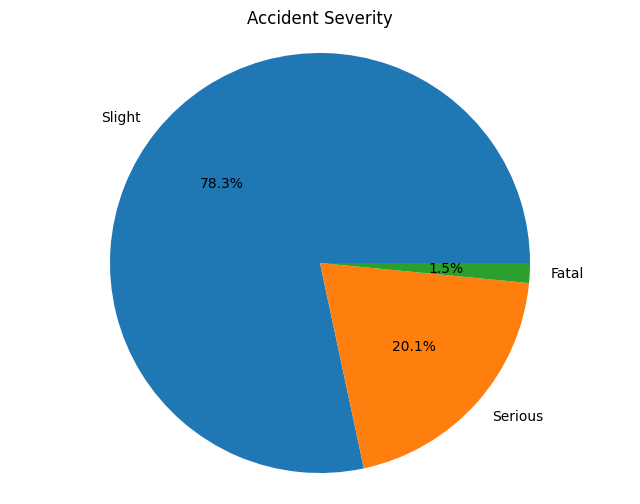

In [74]:
# Define labels for the pie chart
accident_sev = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}
accidents_sev_dist = accident['accident_severity'].map(accident_sev).value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(x= accidents_sev_dist.values, labels=accidents_sev_dist.index, autopct='%1.1f%%')
plt.title('Accident Severity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [82]:
(accident.number_of_vehicles.value_counts()/len(accident))*100

number_of_vehicles
2     62.930515
1     28.213029
3      6.843277
4      1.462735
5      0.362943
6      0.108554
7      0.051536
8      0.016448
9      0.003290
10     0.003290
11     0.002193
13     0.001097
12     0.001097
Name: count, dtype: float64

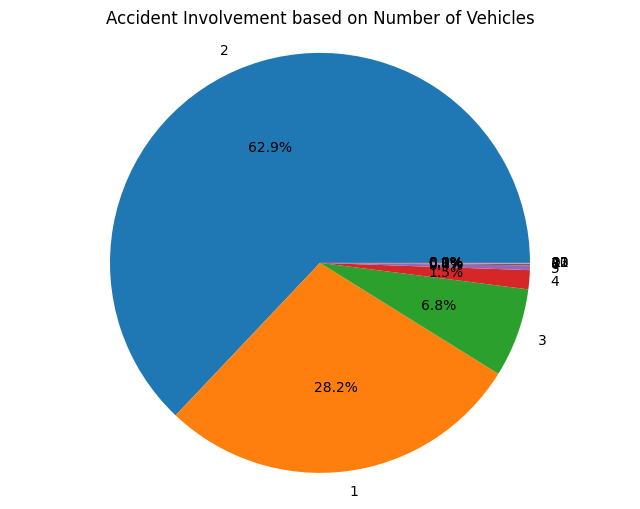

In [83]:

accidents_num_vehichle = accident['number_of_vehicles'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(x= accidents_num_vehichle.values, labels=accidents_num_vehichle.index, autopct='%1.1f%%')
plt.title('Accident Involvement based on Number of Vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Insights:

<li>The data for 2020 shows a total of 91,199 accidents, involving 167,375 vehicles, and resulting in 115,584 casualties.
<li>Most accidents involved a two vehicles (62.9%), followed by one vehicle (28.2%), indicating a high prevalence of double-vehicle incidents.
<li>Fatal accidents constituted 1.5% of the total, while serious and slight accidents accounted for 20.1% and 78.3% respectively.
<li>Accident Severity: Mean accident severity score is 2.77, indicating a strong leaning towards minor accidents.
<li>Number of Vehicles and Casualties: By Median, there were 2 vehicles and 1 casualties per accident.
<li>Speed Limits: Average speed limit at accident sites is 36.3 mph, with a median of 30 mph.
<li>Driver Age: Mean age of drivers involved in accidents is 34.5 years.

## Temporal Analysis

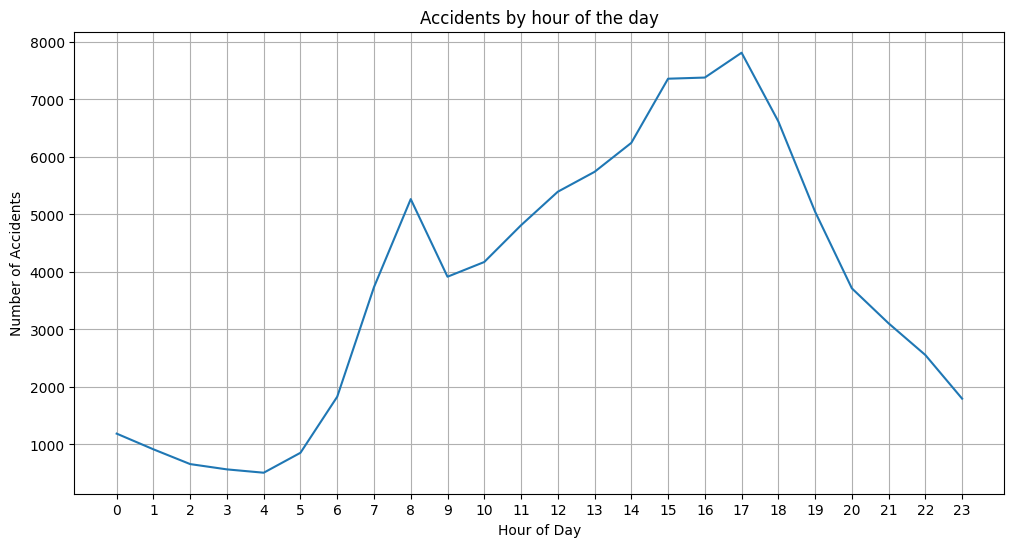

In [84]:
df_hourly = accident.copy()
df_hourly['hour'] = df_hourly['datetime'].dt.hour

df_hourly = df_hourly.groupby('hour')['accident_index'].count()
plt.figure(figsize=(12, 6))
df_hourly.plot()
plt.xticks(ticks=df_hourly.index) 
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by hour of the day')
plt.grid(True)
plt.show()

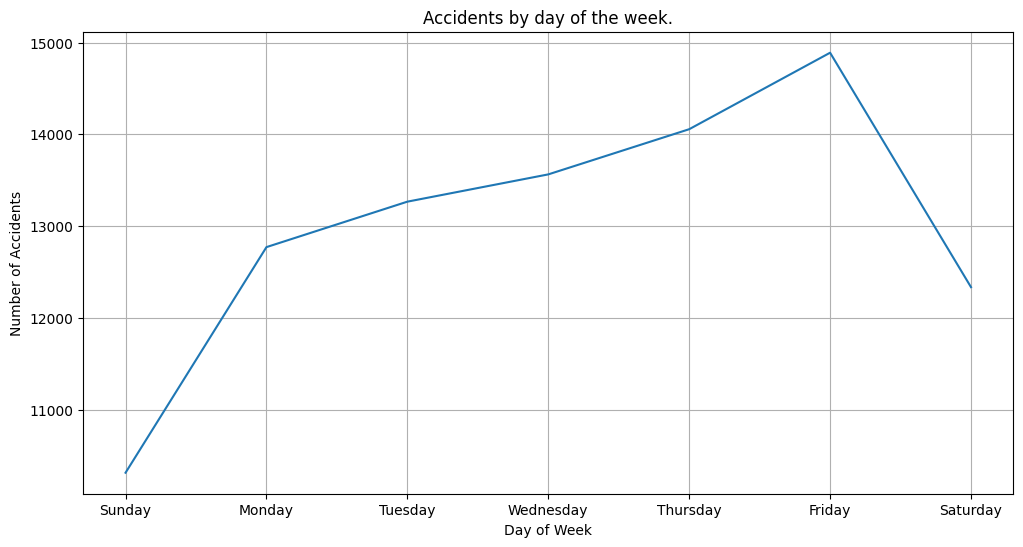

In [85]:
df_daily = accident.copy()
days = list(calendar.day_name)

days = days[-1:] + days[:-1]

df_daily = df_daily.groupby('day_of_week')['accident_index'].count()
plt.figure(figsize=(12, 6))
df_daily.plot()
plt.xticks(ticks=range(1,8), labels=days) 
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by day of the week.')
plt.grid(True)
plt.show()

In [86]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

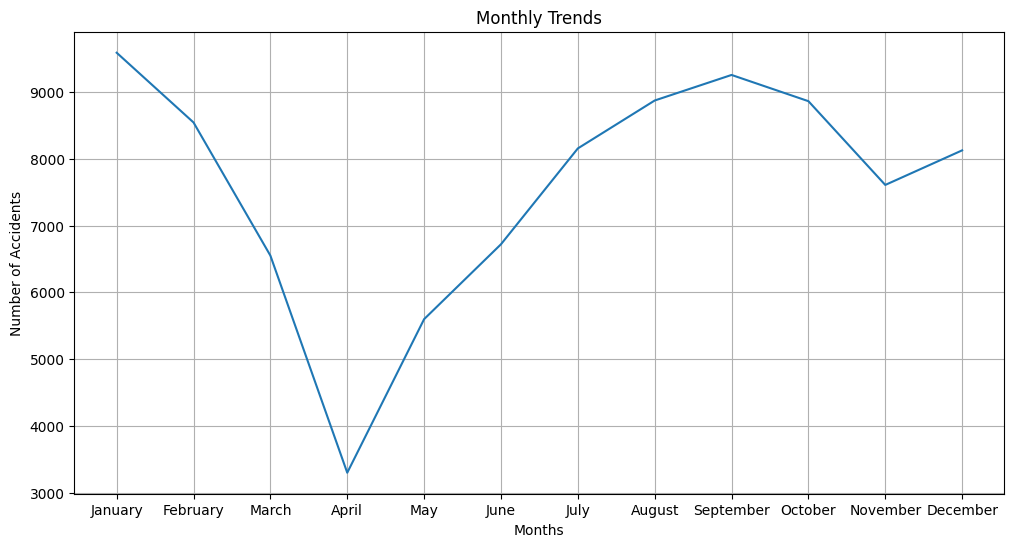

In [87]:

df_monthly = accident.copy()
df_monthly['month'] = df_monthly['datetime'].dt.month
df_monthly['season'] = df_monthly['month'].apply(get_season)
df_seasonally = df_monthly.copy()


df_monthly = df_monthly['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
df_monthly.plot()
plt.xticks(ticks=range(1,13), labels=list(calendar.month_name)[1:]) 
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.title('Monthly Trends')
plt.grid(True)
plt.show()

In [88]:
df_seasonally = df_seasonally['season'].value_counts()

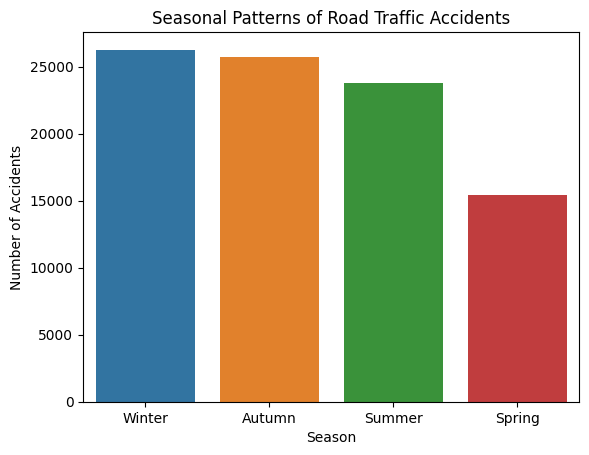

In [89]:

sns.barplot(x=df_seasonally.index, y=df_seasonally.values, hue=df_seasonally.index)
plt.title('Seasonal Patterns of Road Traffic Accidents')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.show()

In [90]:
# List of public holidays
public_holidays = [
    '2020-01-01', '2020-01-02', '2020-03-17', '2020-04-10', '2020-04-13', '2020-05-08', 
    '2020-05-25', '2020-07-13', '2020-08-03', '2020-08-31', '2020-11-05', '2020-11-30', '2020-12-25', '2020-12-28'
]

# Convert to datetime
public_holidays = pd.to_datetime(public_holidays).date

# Add a column to indicate public holidays
df['is_public_holiday'] = df['date'].isin(public_holidays)
accident['is_public_holiday'] = accident['date'].isin(public_holidays)


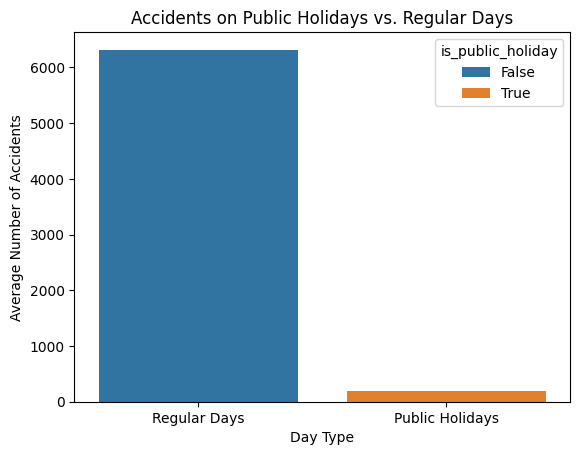

In [91]:
leap = 366 if calendar.isleap(2020) else 365 

df_holiday= pd.DataFrame(accident['is_public_holiday'].value_counts())
df_holiday.astype(float)
df_holiday = df_holiday.apply(lambda x: x / len(public_holidays) if x.name else x / (leap - len(public_holidays)))
#a.apply(lambda x: x / len(public_holidays) if x.index.empty else x / (leap - len(public_holidays)))
sns.barplot(x=df_holiday.index, y='count', data=df_holiday, hue=df_holiday.index)
plt.xticks([0, 1], ['Regular Days', 'Public Holidays'])
plt.xlabel('Day Type')
plt.ylabel('Average Number of Accidents')
plt.title('Accidents on Public Holidays vs. Regular Days')
plt.show()

### Insights

<li>Monthly Distribution: Accidents were higher in the winter months, peaking in January
<li>Time of Day: Accidents peaked during the morning (8-9 AM) and evening rush hours (4-6 PM).
<li>Day of Week: Weekday accidents were more frequent, likely due to increased commuting traffic.
<li>Public Holidays: Accidents occur more on regular days than public holidays

## Spatial Analysis

In [92]:
accident.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'datetime',
       'is_public_holiday'],
      dtype='object')

In [93]:
accident.groupby(['latitude', 'longitude']).size()

latitude   longitude
49.970479  -5.198029    1
49.991142  -5.209168    1
49.993978  -5.210069    1
49.998169  -5.212386    1
50.011580  -5.180501    1
                       ..
60.163281  -1.165808    1
60.190964  -1.238933    1
60.252711  -1.298766    1
60.257000  -1.225494    1
60.541144  -1.349194    1
Length: 91045, dtype: int64

In [94]:
accident[['latitude', 'longitude']].nunique()

latitude     88749
longitude    89590
dtype: int64

In [95]:
accident.longitude.max()

1.756257

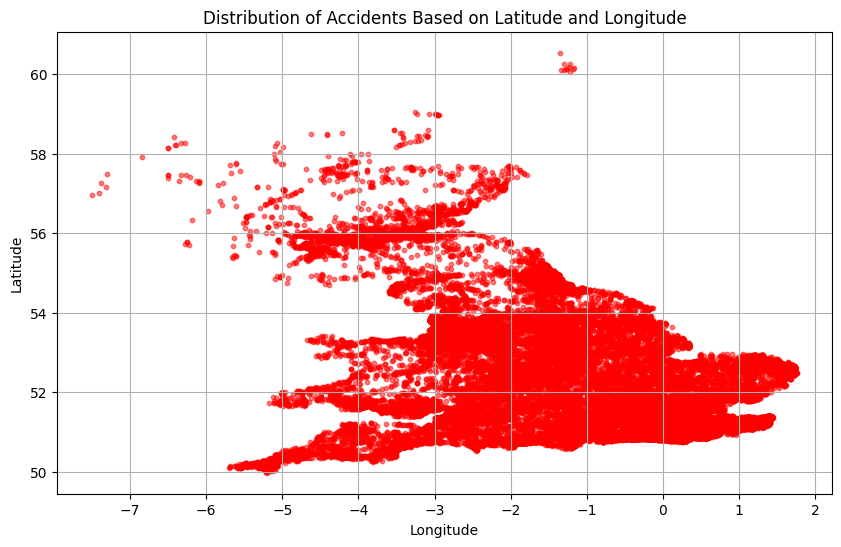

In [96]:
# Assuming 'accident' is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(accident['longitude'], accident['latitude'], alpha=0.5, c='red', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax = plt.gca()

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.title('Distribution of Accidents Based on Latitude and Longitude')
plt.grid(True)
plt.show()

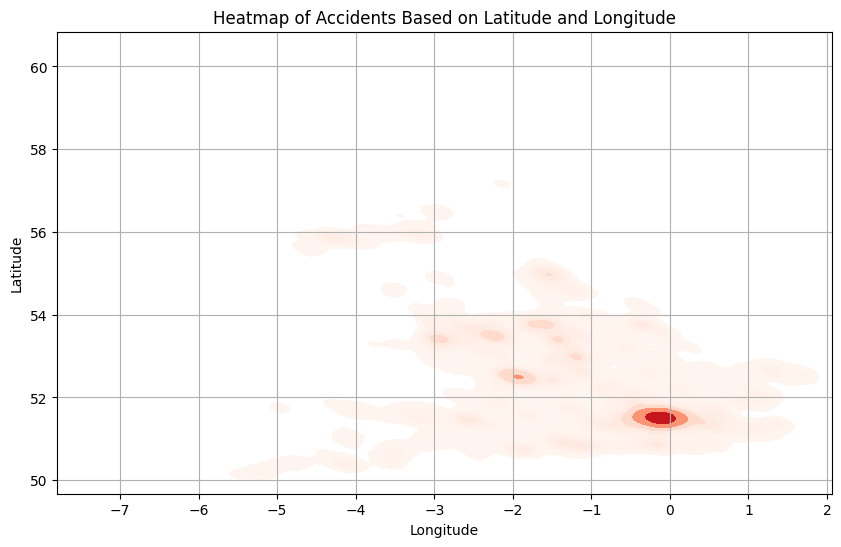

In [97]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=accident['longitude'], y=accident['latitude'], cmap='Reds', fill=True, bw_adjust=0.5)
ax = plt.gca()

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Accidents Based on Latitude and Longitude')
plt.grid(True)
plt.show()

In [98]:
import folium

# Create a map centered around Great Britain
map_gb = folium.Map(location=[54.0, -2.0], zoom_start=6)

# Add accident locations to the map
for idx, row in accident.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=2,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map_gb)

# Save the map to an HTML file
map_gb.save('accidents_map.html')

In [99]:
# from IPython.display import display
# display(map_gb)

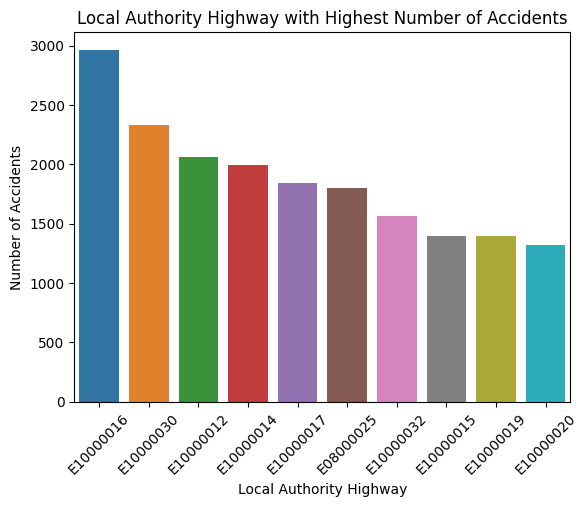

In [100]:
df_highway = accident['local_authority_highway'].value_counts()[:10]
sns.barplot(x=df_highway.index, y=df_highway.values, hue=df_highway.index)
plt.xticks(rotation=45)
plt.title('Local Authority Highway with Highest Number of Accidents')
plt.xlabel('Local Authority Highway')
plt.ylabel('Number of Accidents')
plt.show()

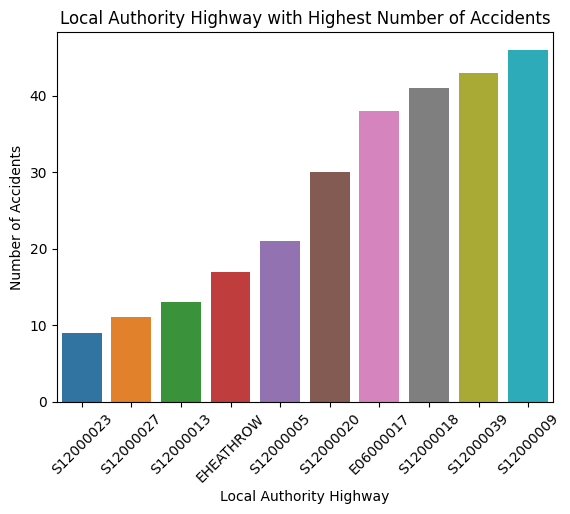

In [101]:
df_highway = accident['local_authority_highway'].value_counts()[-10:].sort_values(ascending=True)
sns.barplot(x=df_highway.index, y=df_highway.values, hue=df_highway.index)
plt.xticks(rotation=45)
plt.title('Local Authority Highway with Highest Number of Accidents')
plt.xlabel('Local Authority Highway')
plt.ylabel('Number of Accidents')
plt.show()

In [102]:
accident['local_authority_district'].value_counts()[:10]

local_authority_district
 300    1801
 9      1063
 1      1029
 204     997
-1       991
 10      932
 5       897
 20      892
 8       888
 32      863
Name: count, dtype: int64

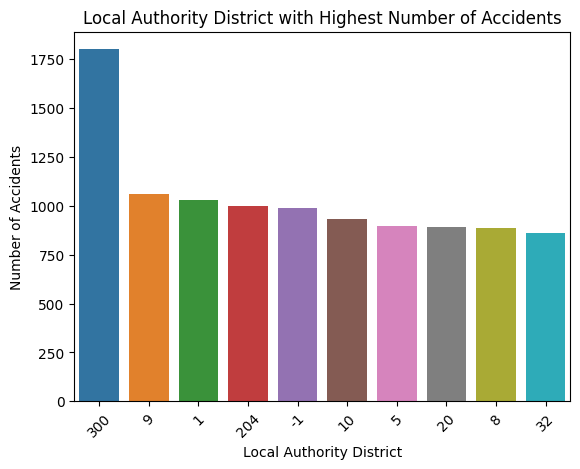

In [103]:
df_district = accident['local_authority_district'].value_counts()[:10]
sns.barplot(x=df_district.index.astype(str), y=df_district.values, hue=df_district.index.astype(str))
plt.xticks(rotation=45)
plt.title('Local Authority District with Highest Number of Accidents')
plt.xlabel('Local Authority District')
plt.ylabel('Number of Accidents')
plt.show()

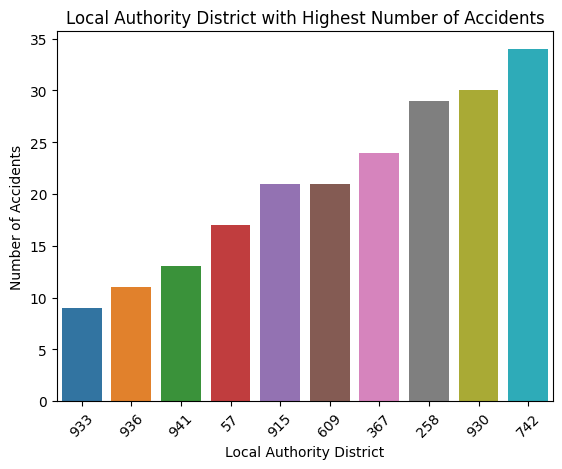

In [104]:
df_district = accident['local_authority_district'].value_counts()[-10:].sort_values(ascending=True)
sns.barplot(x=df_district.index.astype(str), y=df_district.values, hue=df_district.index.astype(str))
plt.xticks(rotation=45)
plt.title('Local Authority District with Highest Number of Accidents')
plt.xlabel('Local Authority District')
plt.ylabel('Number of Accidents')
plt.show()

In [105]:
accident['urban_or_rural_area'].value_counts()

urban_or_rural_area
1    61737
2    29448
3       14
Name: count, dtype: int64

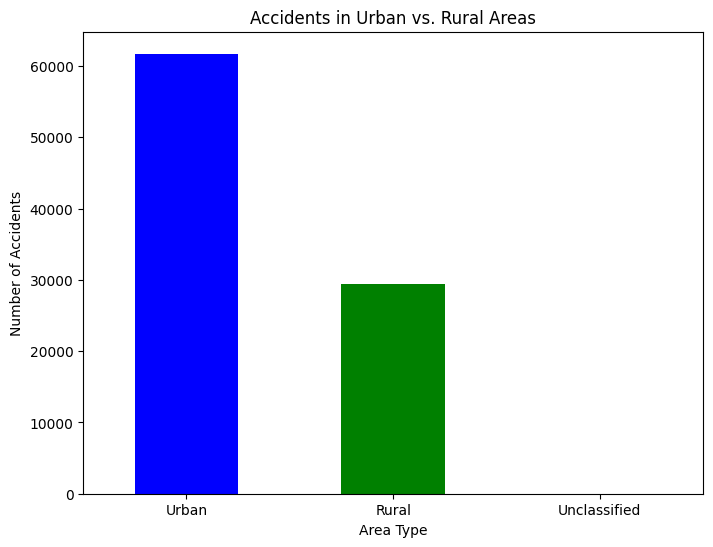

In [106]:
# Group by urban or rural area
accidents_by_area = accident['urban_or_rural_area'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
accidents_by_area.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents in Urban vs. Rural Areas')
plt.xticks([0, 1, 2], ['Urban', 'Rural', 'Unclassified'], rotation=0)
plt.show()

### Insights:

<li>Accident Locations: Urban areas had a higher incidence of accidents compared to rural areas.
<li>Regional Distribution: London, South East, and North West regions reported the highest number of accidents.

## Analysis of Accident Severity

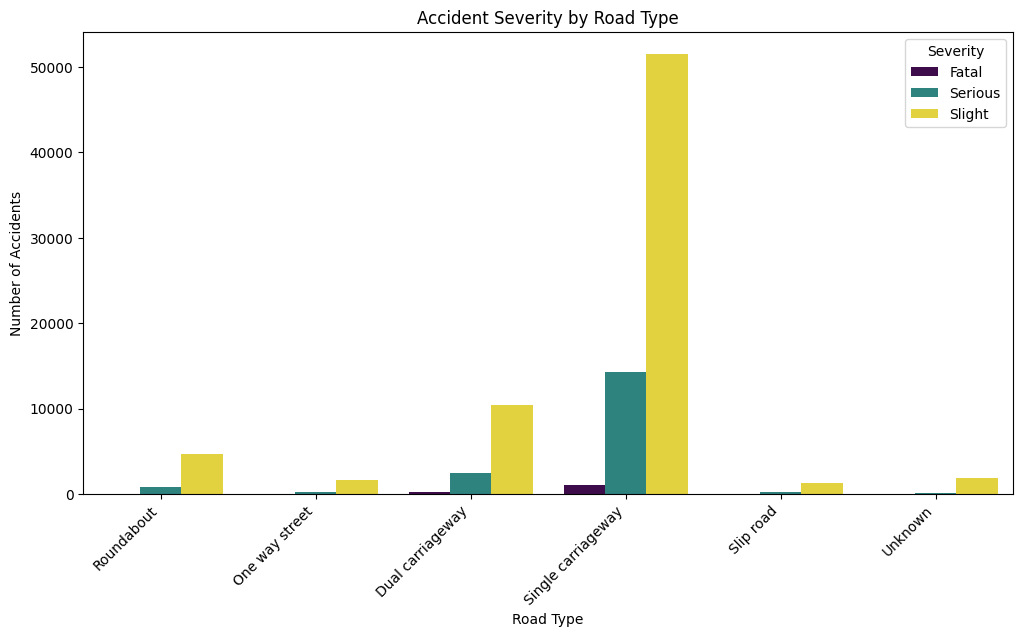

In [107]:
# Severity distribution by road type
plt.figure(figsize=(12, 6))
sns.countplot(data=accident, x='road_type', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
road_types = ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 'Slip road', 'Unknown']
labels = list(range(6))
plt.xticks(labels, road_types, rotation=45, ha='right')

legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

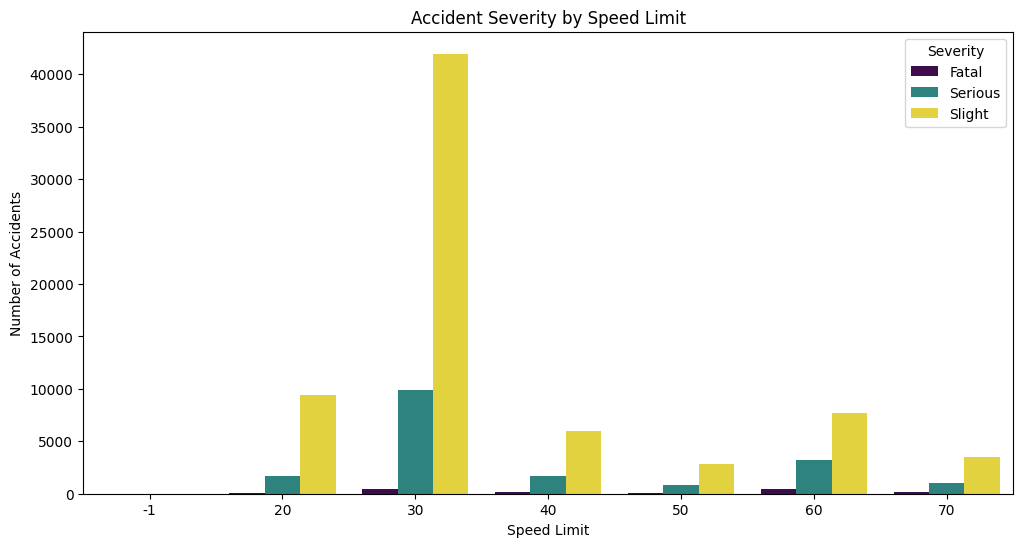

In [108]:
# Severity distribution by speed limit
plt.figure(figsize=(12, 6))
sns.countplot(data=accident, x='speed_limit', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

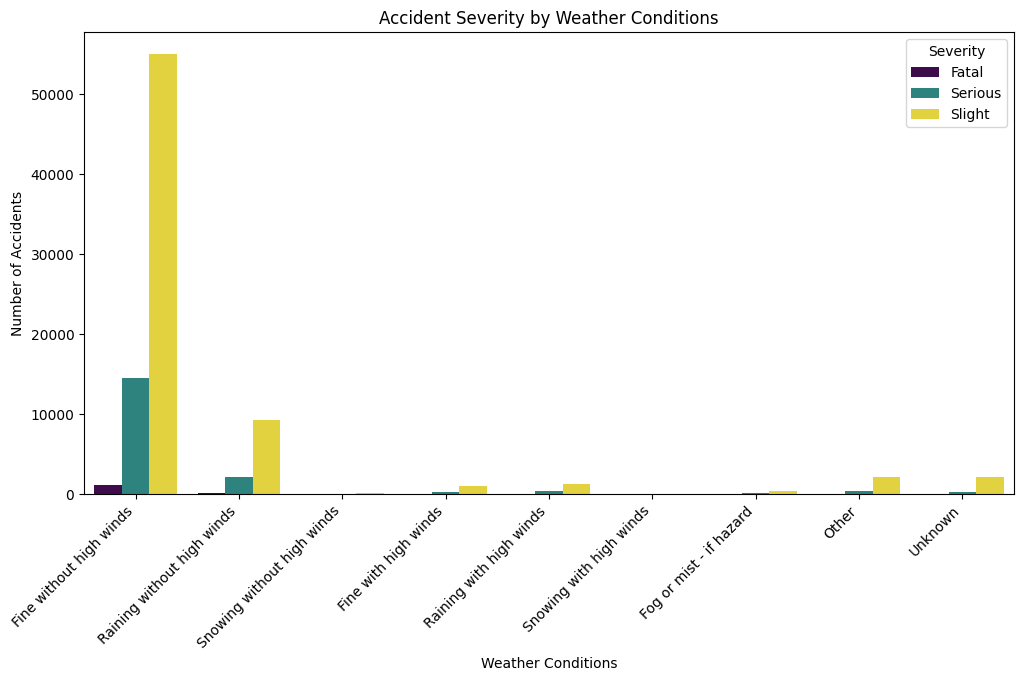

In [109]:
# Severity distribution by weather conditions
filtered_data = accident[accident['weather_conditions'] != -1]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='weather_conditions', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
weather_conditions = ['Fine without high winds', 'Raining without high winds', 'Snowing without high winds', 'Fine with high winds', 'Raining with high winds', 'Snowing with high winds', 'Fog or mist - if hazard', 'Other', 'Unknown']
labels = list(range(9))
plt.xticks(labels, weather_conditions, rotation=45, ha='right')

legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

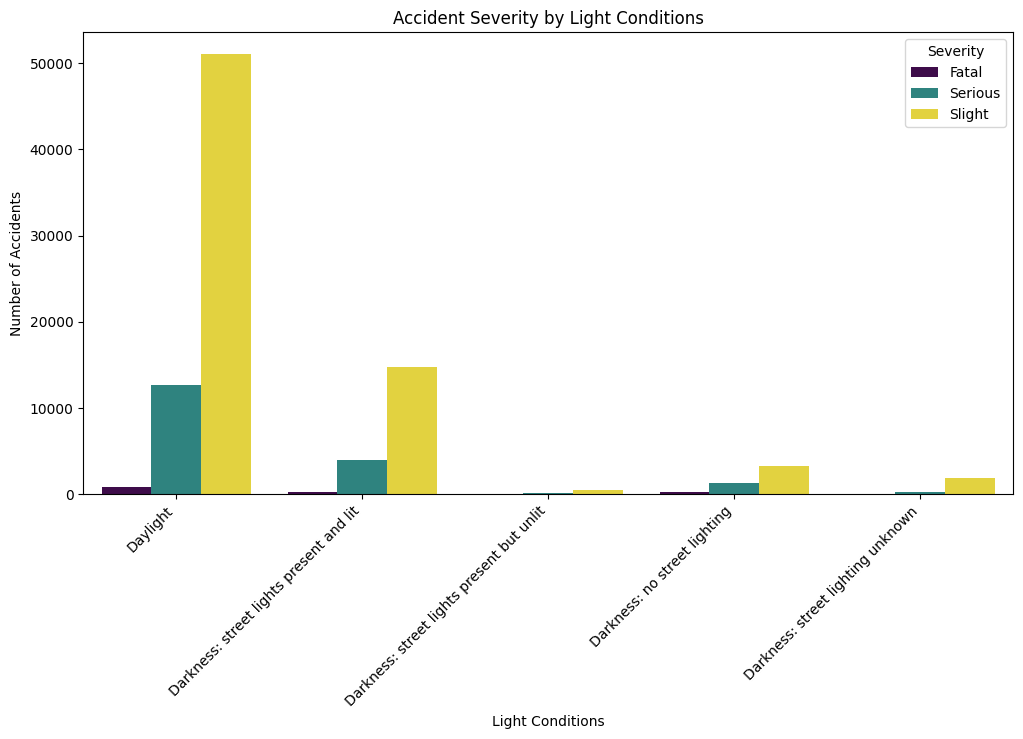

In [110]:
# Severity distribution by light conditions
filtered_data = accident[accident['light_conditions'] != -1]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='light_conditions', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
light_conditions = ['Daylight', 'Darkness: street lights present and lit', 'Darkness: street lights present but unlit', 'Darkness: no street lighting', 'Darkness: street lighting unknown']
labels = list(range(5))
plt.xticks(labels, light_conditions, rotation=45, ha='right')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

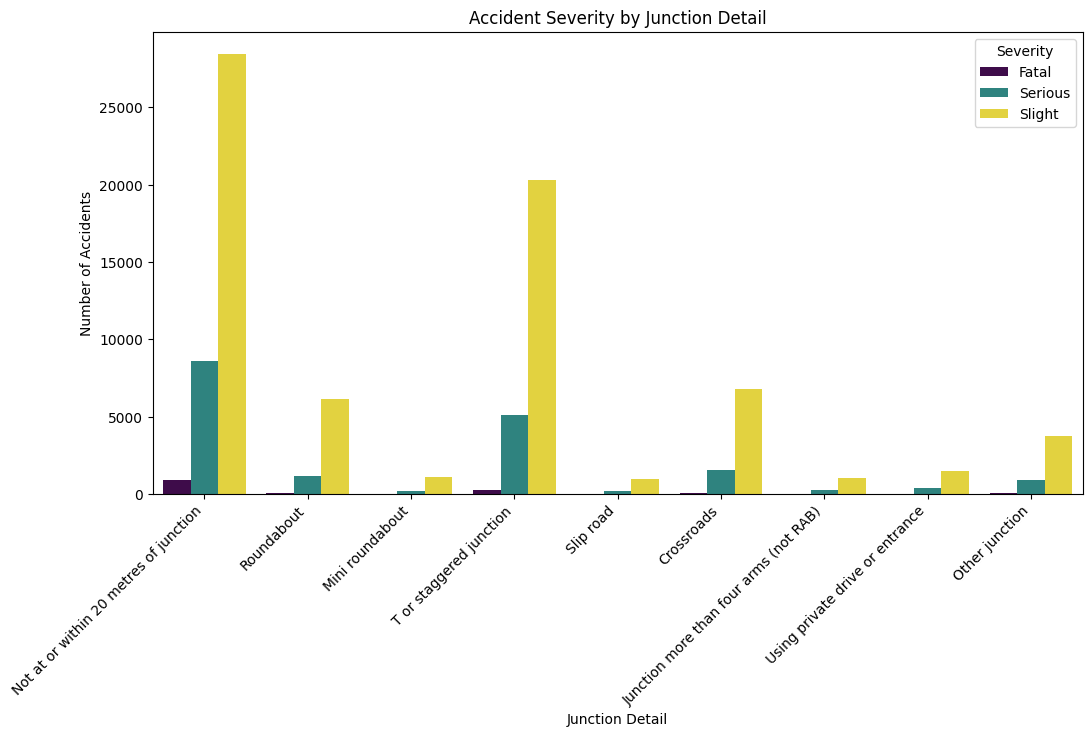

In [111]:
# Severity distribution by junction detail
filtered_data = accident[(accident['junction_detail'] != 99) & (accident['junction_detail'] != -1)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='junction_detail', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Number of Accidents')
junction_detail = ['Not at or within 20 metres of junction', 'Roundabout', 'Mini roundabout', 'T or staggered junction', 'Slip road', 'Crossroads', 'Junction more than four arms (not RAB)', 'Using private drive or entrance', 'Other junction']
labels = list(range(9))
plt.xticks(labels, junction_detail, rotation=45, ha='right')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()


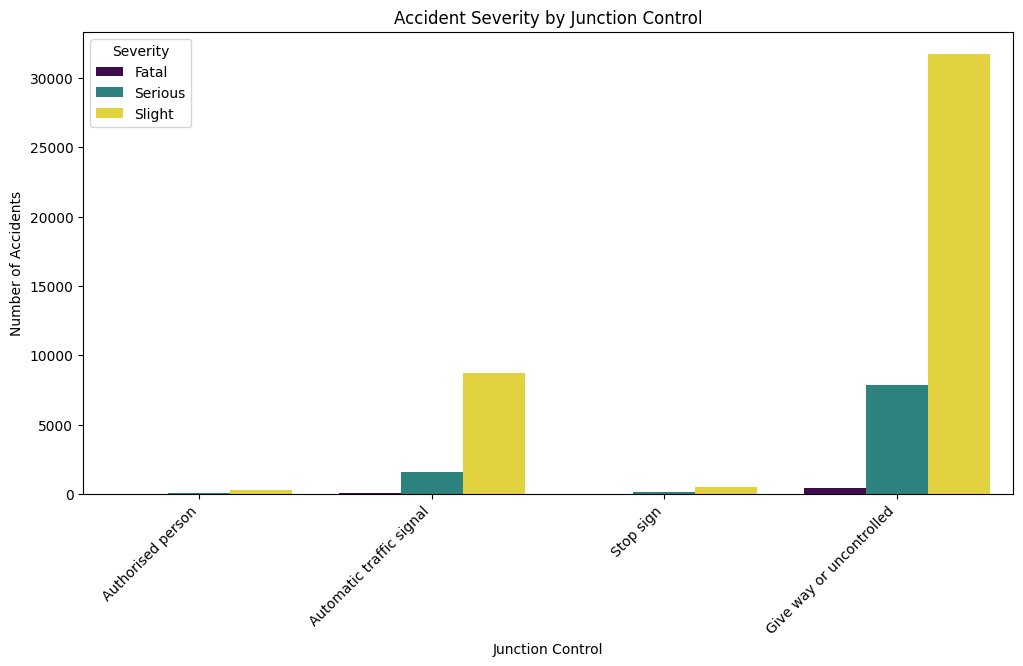

In [112]:
# Severity distribution by junction control

filtered_data = accident[(accident['junction_control'] != -1) & (accident['junction_control'] != 9)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='junction_control', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Number of Accidents')
junction_control = ['Authorised person', 'Automatic traffic signal', 'Stop sign', 'Give way or uncontrolled']
labels = list(range(4))
plt.xticks(labels, junction_control, rotation=45, ha='right')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

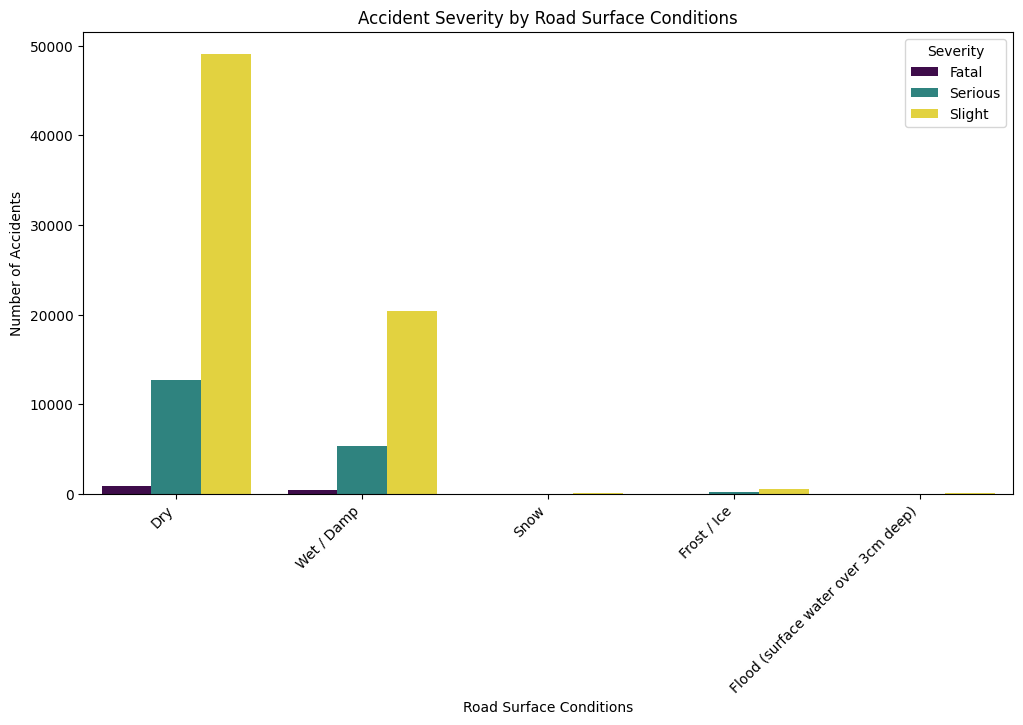

In [113]:
# Severity distribution by road surface conditions

filtered_data =  accident[(accident['road_surface_conditions'] != -1) & (accident['road_surface_conditions'] != 9)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='road_surface_conditions', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
road_surface_condition = ['Dry', 'Wet / Damp', 'Snow', 'Frost / Ice', 'Flood (surface water over 3cm deep)']
labels = list(range(len(road_surface_condition)))
plt.xticks(labels, road_surface_condition, rotation=45, ha='right')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()


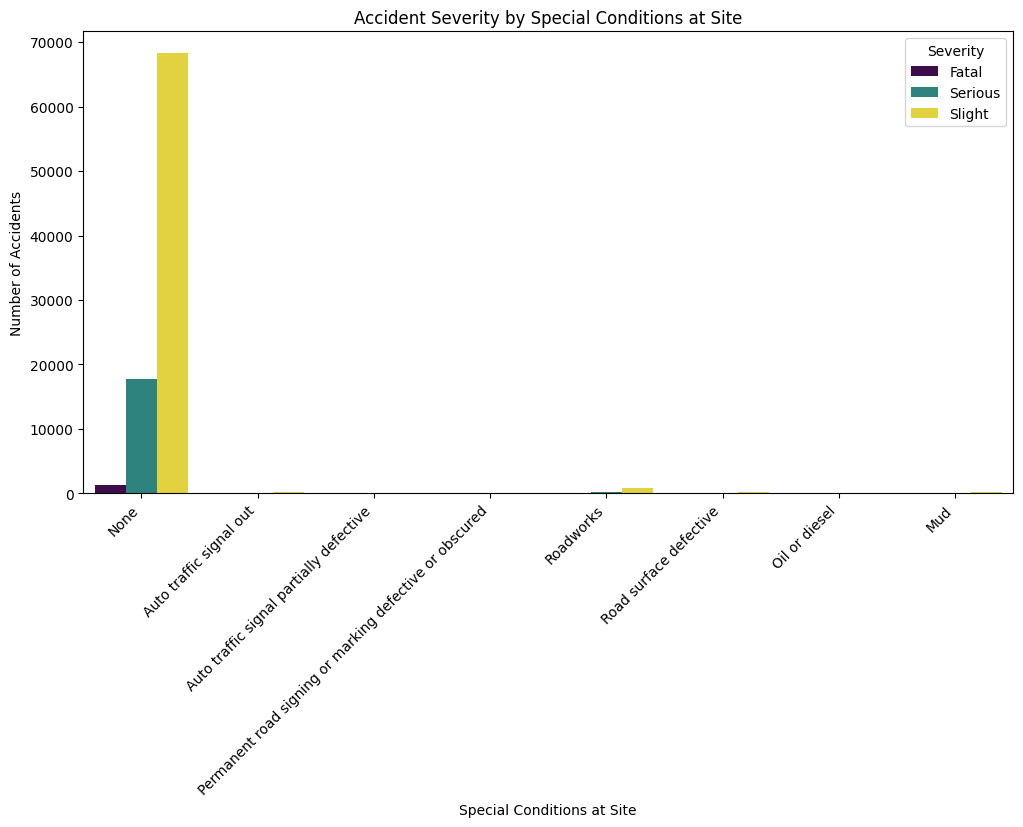

In [114]:

# Severity distribution by special conditions at site
filtered_data =  accident[(accident['special_conditions_at_site'] != -1) & (accident['special_conditions_at_site'] != 9)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='special_conditions_at_site', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Special Conditions at Site')
plt.xlabel('Special Conditions at Site')
plt.ylabel('Number of Accidents')
special_conditions = ['None', 'Auto traffic signal out', 'Auto traffic signal partially defective', 'Permanent road signing or marking defective or obscured', 'Roadworks', 'Road surface defective', 'Oil or diesel', 'Mud']
labels = list(range(len(special_conditions)))
plt.xticks(labels, special_conditions, rotation=45, ha='right')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

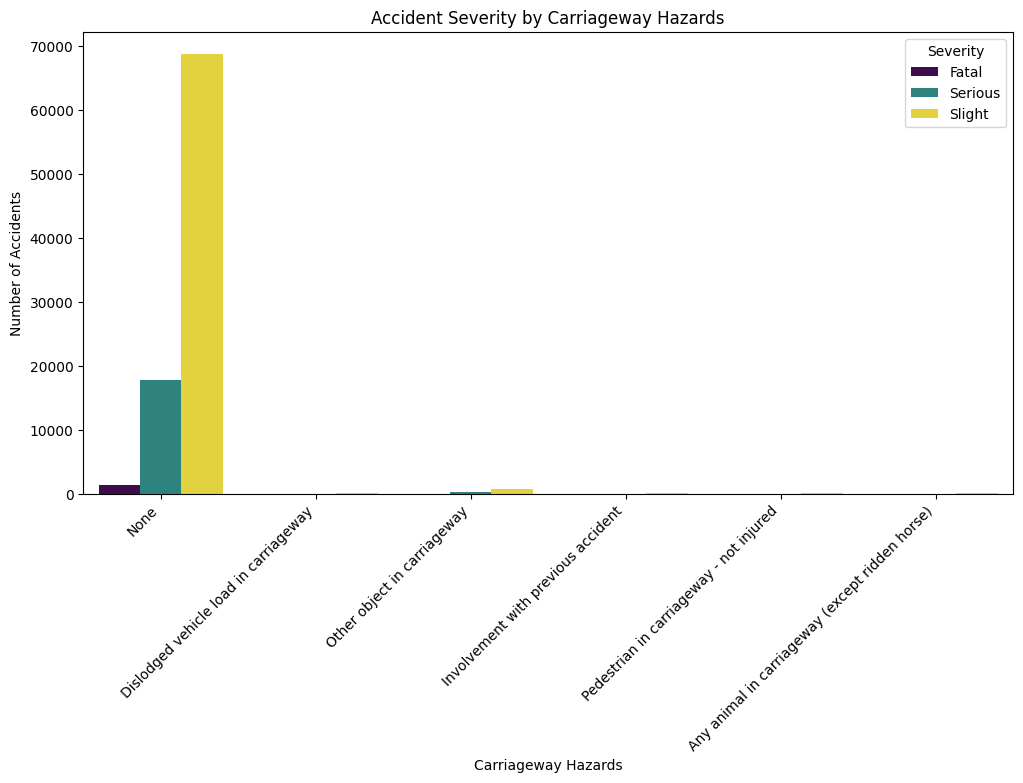

In [115]:
# Severity distribution by carriageway hazards
filtered_data =  accident[(accident['carriageway_hazards'] != -1) & (accident['carriageway_hazards'] != 9)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='carriageway_hazards', hue='accident_severity', palette='viridis')
plt.title('Accident Severity by Carriageway Hazards')
plt.xlabel('Carriageway Hazards')
plt.ylabel('Number of Accidents')
carriageway_hazards = ['None', 'Dislodged vehicle load in carriageway', 'Other object in carriageway', 'Involvement with previous accident', 'Pedestrian in carriageway - not injured', 'Any animal in carriageway (except ridden horse)']
labels = list(range(len(carriageway_hazards)))
plt.xticks(labels, carriageway_hazards, rotation=45, ha='right')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.show()

### Insights:

<li>Severity by Light Conditions: Accidents in daylight were more frequent.
<li>Severity by Junction Detail: Staggered Junctions and non-junction areas had a higher number of accidents.
<li>Severity by Road Surface: Dry road conditions saw more accidents.

## Vehicle and Casualty Analysis

In [116]:
# Distribution of vehicle types

vehicle_type_dist = pd.DataFrame(vehicle['vehicle_type'].value_counts()).reset_index()

vehicle_types = {
    9: 'Car',
    8: 'Taxi / Private hire car',
    19: 'Van - Goods vehicle 3.5 tonnes mgw and under',
    20: 'Goods vehicle over 3.5 tonnes mgw and under 7.5 tonnes mgw',
    21: 'Goods vehicle 7.5 tonnes mgw & over',
    98: 'Goods vehicle - unknown weight',
    2: 'M/cycle 50cc and under',
    3: 'M/cycle over 50cc and up to 125cc',
    4: 'M/cycle over 125cc and up to 500cc',
    5: 'Motorcycle over 500cc',
    97: 'Motorcycle - cc unknown',
    23: 'Electric Motorcycle',
    1: 'Pedal cycle',
    11: 'Bus or coach (17 or more passenger seats)',
    10: 'Minibus (8-16 passenger seats)',
    17: 'Agricultural vehicle (include diggers etc)',
    16: 'Ridden horse',
    22: 'Mobility scooter',
    18: 'Tram / Light rail',
    90: 'Other vehicle'
}

vehicle_type_dist['vehicle_type'] = vehicle_type_dist['vehicle_type'].map(vehicle_types)

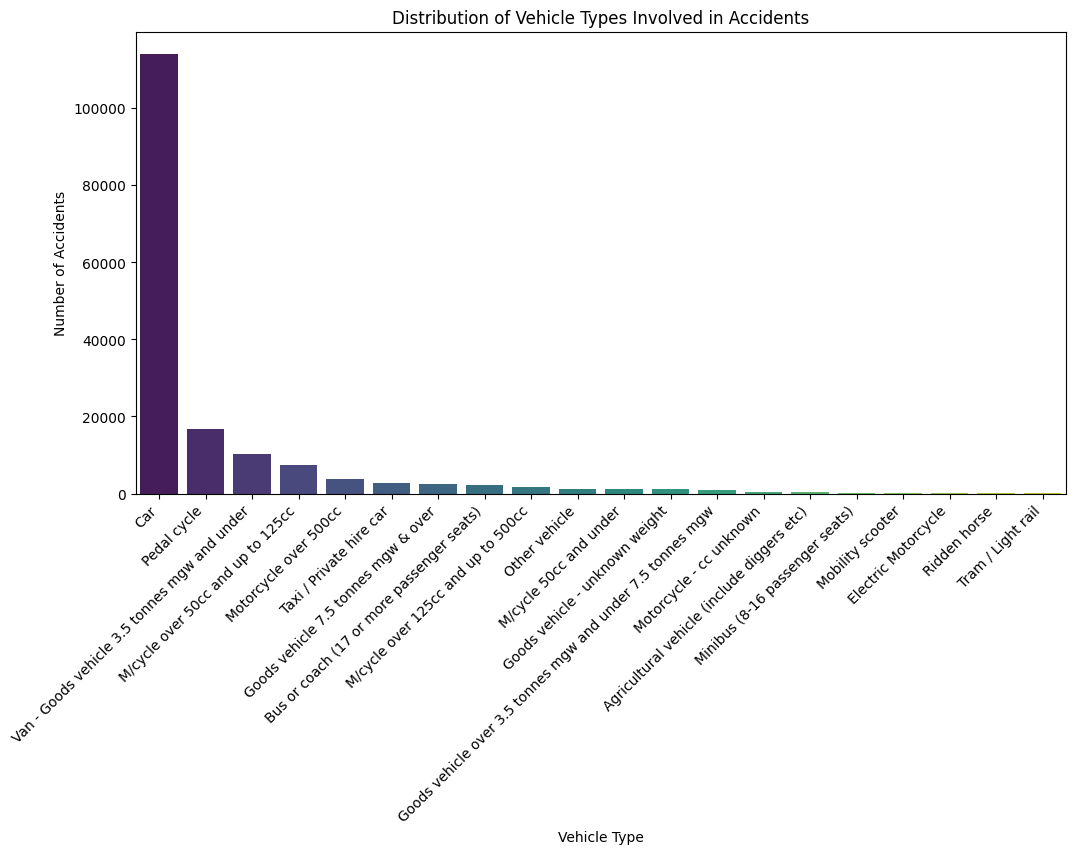

In [117]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle_type', y = 'count', data=vehicle_type_dist, hue= 'vehicle_type', palette='viridis')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents')

plt.xticks(rotation=45, ha='right')
plt.show()

In [118]:
# Distribution of vehicle maneuvers
maneuver_types = {
    1: 'Reversing',
    2: 'Parked',
    3: 'Waiting to go ahead but held up',
    4: 'Slowing or stopping',
    5: 'Moving off',
    6: 'U turn',
    7: 'Turning left',
    8: 'Waiting to turn left',
    9: 'Turning right',
    10: 'Waiting to turn right',
    11: 'Changing lane to left',
    12: 'Changing lane to right',
    13: 'Overtaking moving vehicle on its offside',
    14: 'Overtaking stationary vehicle on its offside',
    15: 'Overtaking on nearside',
    16: 'Going ahead left hand bend',
    17: 'Going ahead right hand bend',
    18: 'Going ahead other'
}

vehicle_manoeuvre_dist = vehicle[(vehicle['vehicle_manoeuvre'] != -1) & (vehicle['vehicle_manoeuvre'] != 99)]
vehicle_manoeuvre_dist = pd.DataFrame(vehicle_manoeuvre_dist['vehicle_manoeuvre'].value_counts()).reset_index()
vehicle_manoeuvre_dist['vehicle_manoeuvre'] = vehicle_manoeuvre_dist['vehicle_manoeuvre'].map(maneuver_types)

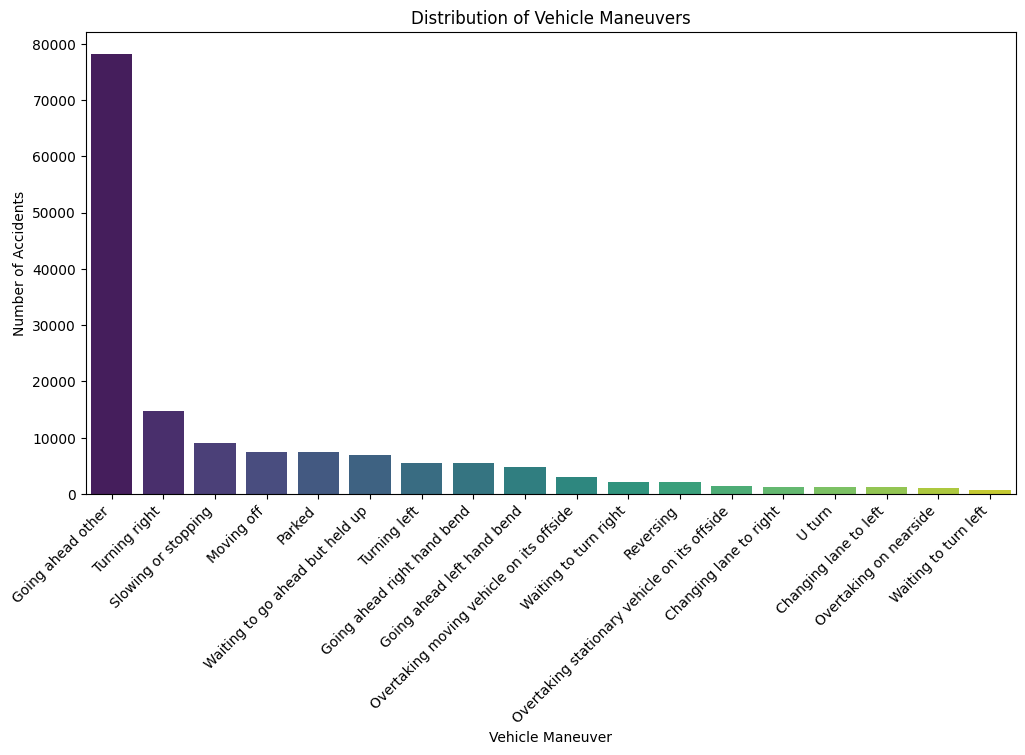

In [119]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle_manoeuvre', y='count', data =vehicle_manoeuvre_dist, hue = 'vehicle_manoeuvre', palette='viridis')
plt.xlabel('Vehicle Maneuver')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Maneuvers')

plt.xticks(rotation=45, ha='right')
plt.show()



In [120]:

# Distribution of vehicle directions

direction_of_travel = {
    0: 'Parked',
    1: 'North',
    2: 'North East',
    3: 'East',
    4: 'South East',
    5: 'South',
    6: 'South West',
    7: 'West',
    8: 'North West'
}

# Map the directions to the 'direction_of_travel' column
vehicle_direction_dist = vehicle[(vehicle['vehicle_direction_from'] != -1) & (vehicle['vehicle_direction_from'] != 9)]
vehicle_direction_dist = pd.DataFrame(vehicle_direction_dist['vehicle_direction_from'].value_counts()).reset_index()
vehicle_direction_dist['vehicle_direction_from'] = vehicle_direction_dist['vehicle_direction_from'].map(direction_of_travel)



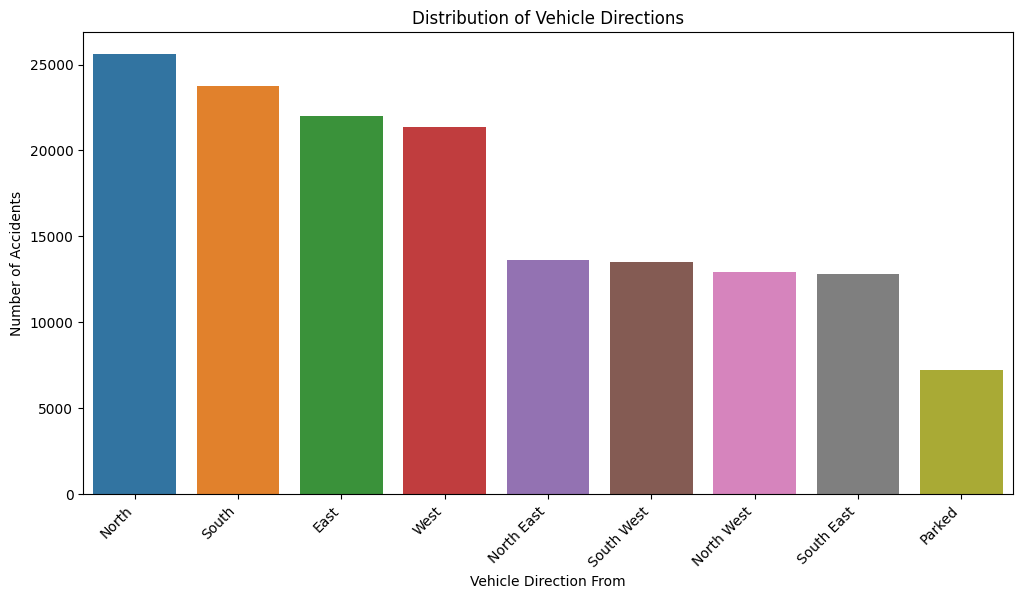

In [121]:


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle_direction_from', y='count', data=vehicle_direction_dist , hue = 'vehicle_direction_from')
plt.xlabel('Vehicle Direction From')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Directions')

plt.xticks( rotation=45, ha='right')
plt.show()

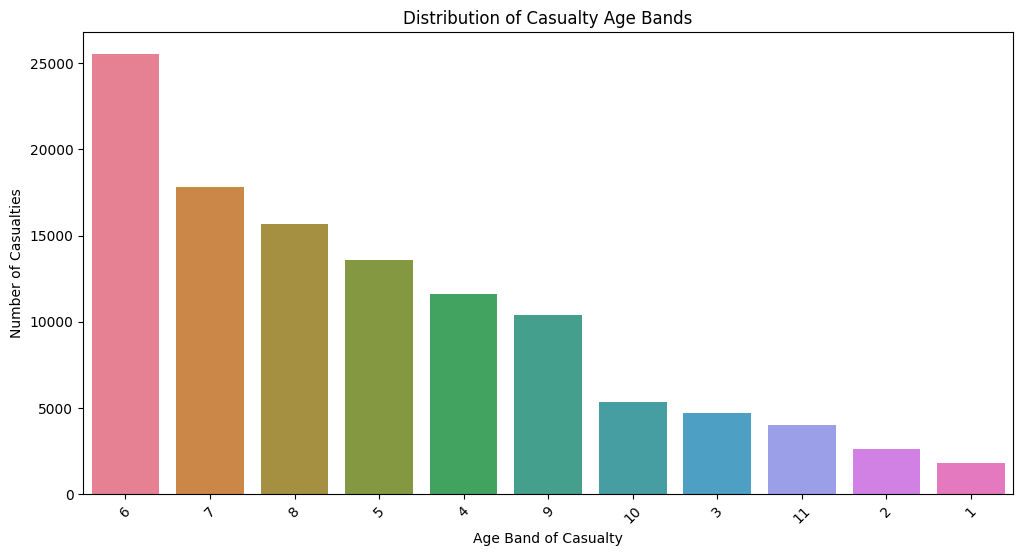

In [122]:
# Distribution of casualty age bands
casualty_age_dist = casualty[casualty['age_band_of_casualty']!=-1]
casualty_age_dist = casualty_age_dist['age_band_of_casualty'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=casualty_age_dist.index.astype(str), y=casualty_age_dist.values, hue=casualty_age_dist.index.astype(str))
plt.xlabel('Age Band of Casualty')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty Age Bands')
plt.xticks(rotation=45)
plt.show()

In [123]:
# Distribution of casualty sex
casualty_sex_dist = casualty[(casualty['sex_of_casualty'] != -1) & (casualty['sex_of_casualty'] != 9)]
casualty_sex_dist = pd.DataFrame(casualty_sex_dist['sex_of_casualty'].value_counts()).reset_index()
sex_of_casualty = {
    1: 'Male',
    2: 'Female'
}

# Map the sex to the 'sex_of_casualty' column
casualty_sex_dist['sex_of_casualty'] = casualty_sex_dist['sex_of_casualty'].map(sex_of_casualty)

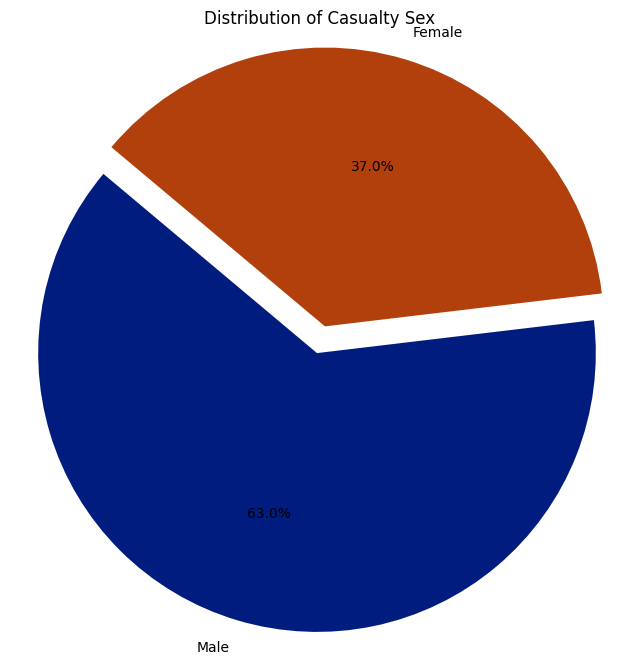

In [124]:
labels = casualty_sex_dist['sex_of_casualty']
sizes = casualty_sex_dist['count']
palette_color = sns.color_palette('dark') 
explode = explode = [0.1, 0] 

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=palette_color,explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Casualty Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

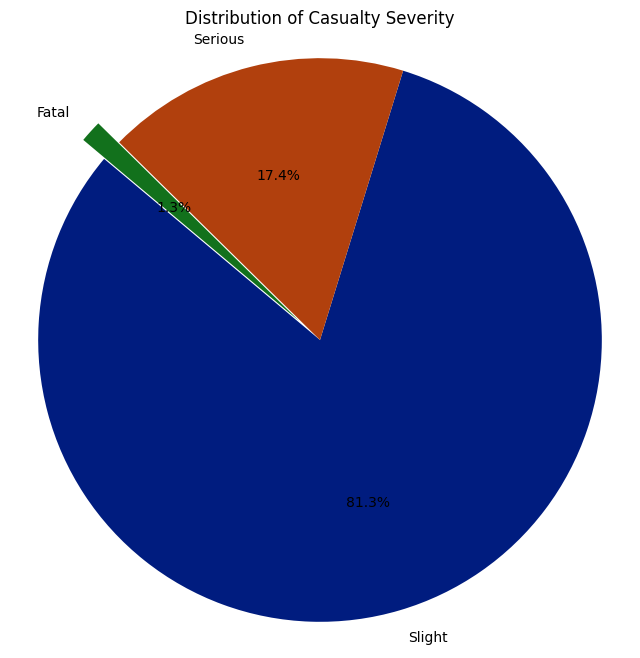

In [125]:
# Distribution of casualty severity
casualty_severity_dist = pd.DataFrame(casualty['casualty_severity'].value_counts()).reset_index()
casualty_severity = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

casualty_severity_dist['casualty_severity'] = casualty_severity_dist['casualty_severity'].map(casualty_severity)


labels = casualty_severity_dist['casualty_severity']
sizes = casualty_severity_dist['count']
palette_color = sns.color_palette('dark') 
explode = explode = [0, 0,0.1] 

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=palette_color,explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Casualty Severity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


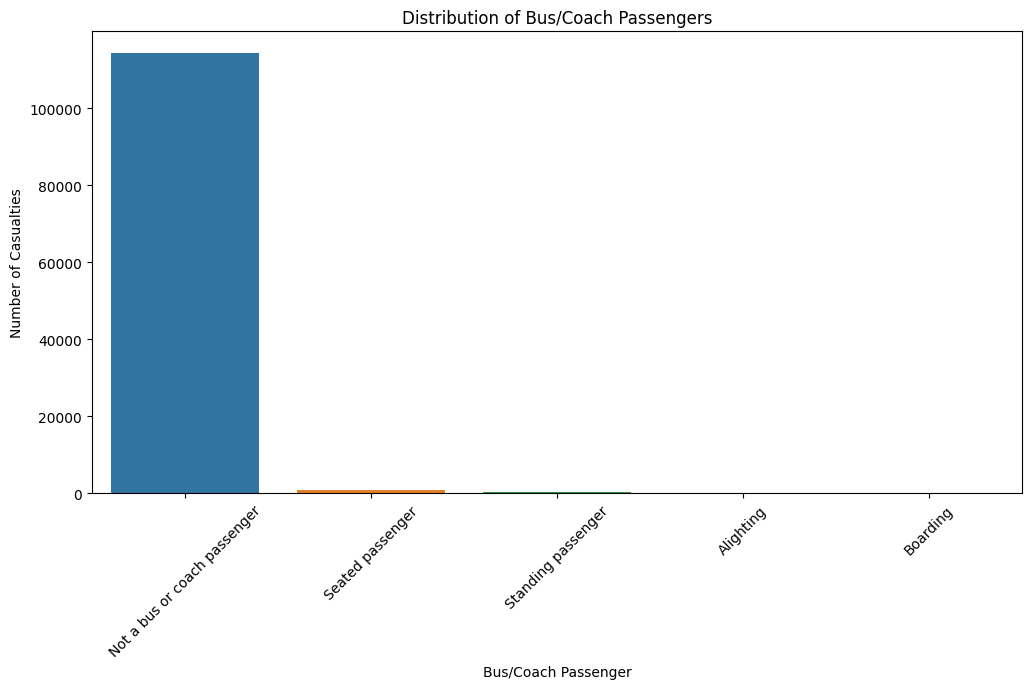

In [126]:
# Distribution of bus/coach passengers
bus_passenger_dist = casualty[(casualty['bus_or_coach_passenger'] != -1) & (casualty['bus_or_coach_passenger'] != 9)]
bus_passenger_dist = pd.DataFrame(bus_passenger_dist['bus_or_coach_passenger'].value_counts()).reset_index()

bus_passenger_types = {
    0: 'Not a bus or coach passenger',
    1: 'Boarding',
    2: 'Alighting',
    3: 'Standing passenger',
    4: 'Seated passenger'
}

# Map the passenger types to the 'bus_passenger_type' column
bus_passenger_dist['bus_or_coach_passenger'] = bus_passenger_dist['bus_or_coach_passenger'].map(bus_passenger_types)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='bus_or_coach_passenger', y='count',data = bus_passenger_dist ,  hue = 'bus_or_coach_passenger')
plt.xlabel('Bus/Coach Passenger')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Bus/Coach Passengers')
plt.xticks(rotation=45)
plt.show()

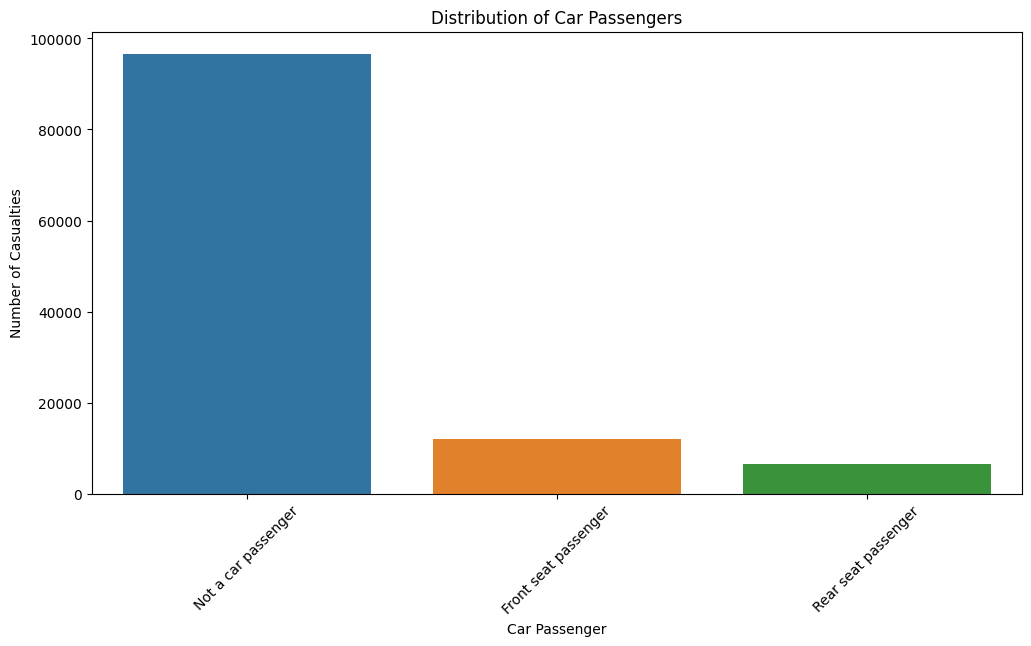

In [127]:
# Distribution of car passengers

car_passenger_dist = casualty[(casualty['car_passenger'] != -1) & (casualty['car_passenger'] != 9)]
car_passenger_dist = pd.DataFrame(car_passenger_dist['car_passenger'].value_counts()).reset_index()
car_passenger_types = {
    0: 'Not a car passenger',
    1: 'Front seat passenger',
    2: 'Rear seat passenger'
}

car_passenger_dist['car_passenger'] = car_passenger_dist['car_passenger'].map(car_passenger_types)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='car_passenger', y='count', data= car_passenger_dist, hue='car_passenger')
plt.xlabel('Car Passenger')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Car Passengers')
plt.xticks(rotation=45)
plt.show()

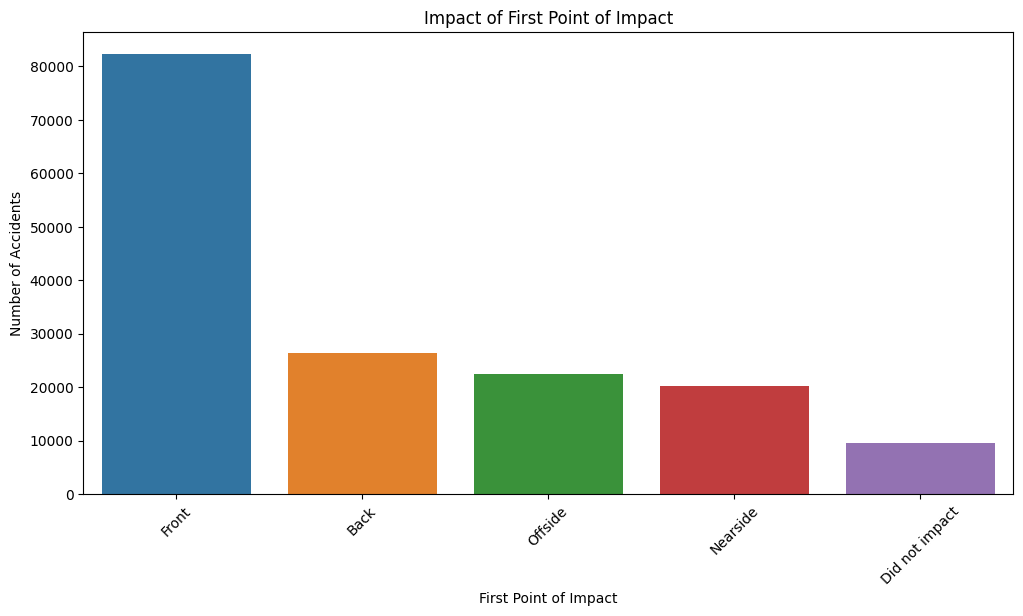

In [128]:
# Distribution of first point of impact
impact_dist = vehicle[(vehicle['first_point_of_impact'] != -1) & (vehicle['first_point_of_impact'] != 9)]
impact_dist = pd.DataFrame(impact_dist['first_point_of_impact'].value_counts()).reset_index()
impact_types = {
    0: 'Did not impact',
    1: 'Front',
    2: 'Back',
    3: 'Offside',
    4: 'Nearside'
}

impact_dist['first_point_of_impact'] = impact_dist['first_point_of_impact'].map(impact_types)



# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='first_point_of_impact', y = 'count',data=impact_dist, hue ='first_point_of_impact')
plt.xlabel('First Point of Impact')
plt.ylabel('Number of Accidents')
plt.title('Impact of First Point of Impact')
plt.xticks(rotation=45)
plt.show()

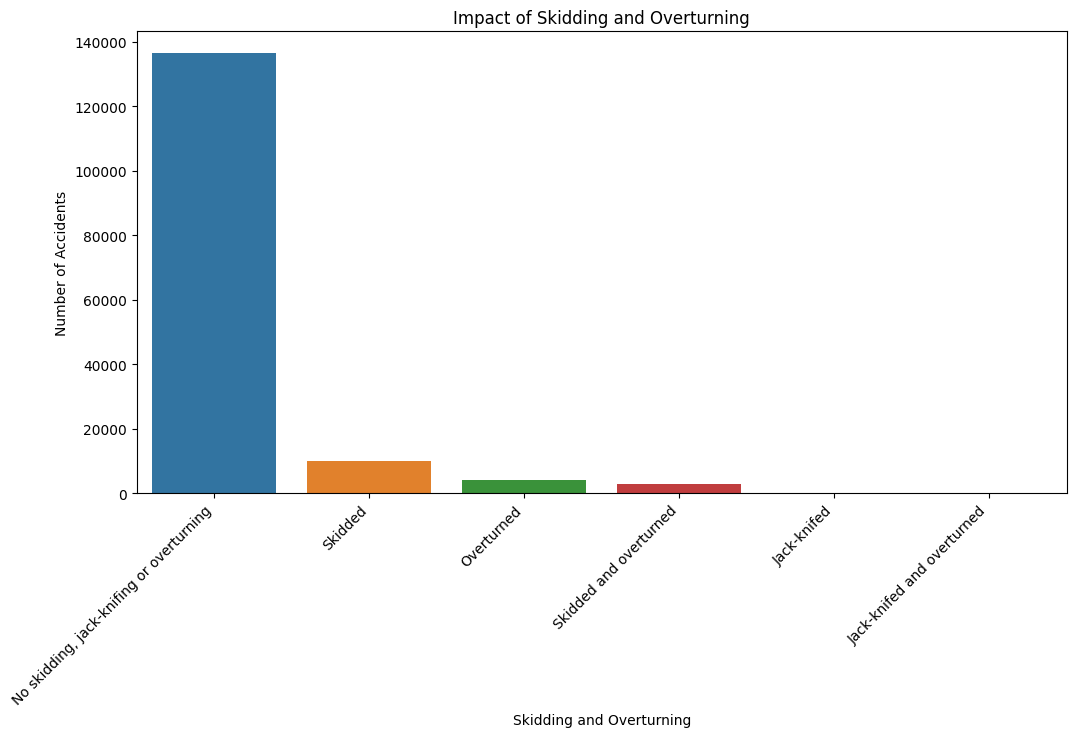

In [129]:
# Distribution of skidding and overturning
skidding_dist = vehicle[(vehicle['skidding_and_overturning'] != -1) & (vehicle['skidding_and_overturning'] != 9)]

skidding_dist = pd.DataFrame(skidding_dist['skidding_and_overturning'].value_counts()).reset_index()
skidding_types = {
    0: 'No skidding, jack-knifing or overturning',
    1: 'Skidded',
    2: 'Skidded and overturned',
    3: 'Jack-knifed',
    4: 'Jack-knifed and overturned',
    5: 'Overturned'
}

skidding_dist['skidding_and_overturning'] = skidding_dist['skidding_and_overturning'].map(skidding_types)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='skidding_and_overturning', y ='count', data=skidding_dist, hue='skidding_and_overturning')
plt.xlabel('Skidding and Overturning')
plt.ylabel('Number of Accidents')
plt.title('Impact of Skidding and Overturning')
plt.xticks(rotation=45, ha='right')
plt.show()

### Insights:

<li>Driver Age and Gender: Younger drivers were more involved in accidents, with a higher incidence among male drivers.
<li>Vehicle Age and Engine Capacity: Older vehicles and those with larger engine capacities were involved in more severe accidents.
<li>Journey Purpose: Commuting and work-related journeys had higher accident rates compared to other purposes.
<li>First Point of Impact: Front as first point of impact is most common in accidents
<li>Vehicle Direction:Vehicles coming from North had higher number of accidents. 
<li>Skidding or Overturning: There was no skidding or overturning involved in most accidents.
<li>Vehicle Manoeuvres: Going ahead others is the most common in accidents.
<li>Fatal accidents constituted 1.3% of the total, while serious and slight accidents accounted for 17.4% and 81.3% respectively.

## Specific Analysis: Motorbike Accidents

In [130]:
len(vehicle)

167375

In [131]:
len(accident_vehicles)

167375

In [132]:
accident_vehicles = pd.merge(accident, vehicle, on='accident_index')
accident_vehicles.time

0         09:00:00
1         13:55:00
2         01:25:00
3         01:50:00
4         02:25:00
            ...   
167370    12:42:00
167371    12:42:00
167372    14:00:00
167373    14:00:00
167374    13:50:00
Name: time, Length: 167375, dtype: object

In [133]:
motorbikes=[2, 3, 4,5,97,23]
motorbike_accidents = accident_vehicles[accident_vehicles['vehicle_type'].isin(motorbikes)]



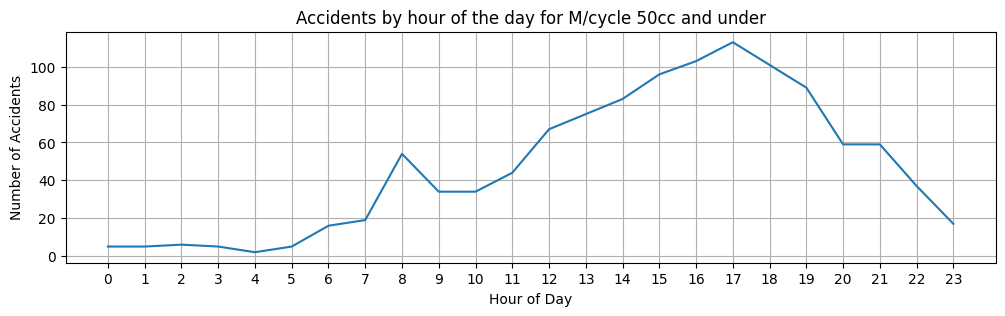

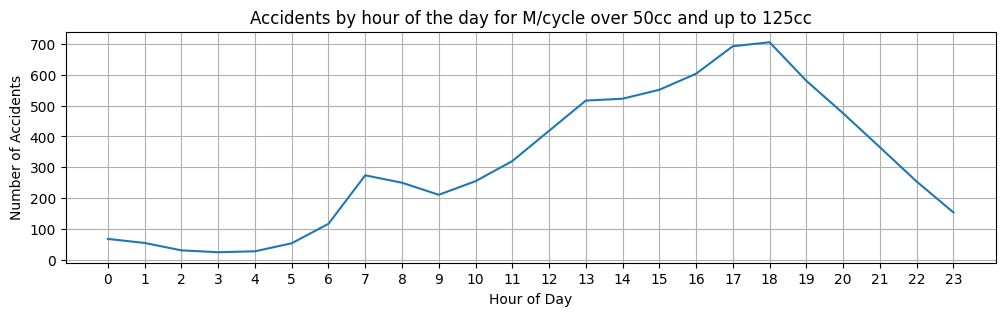

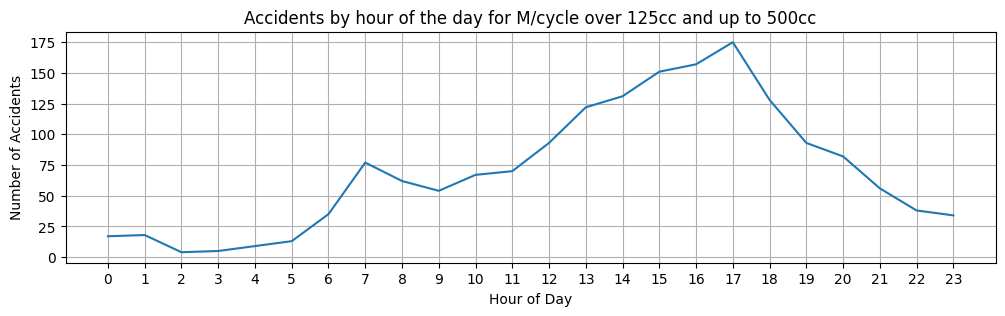

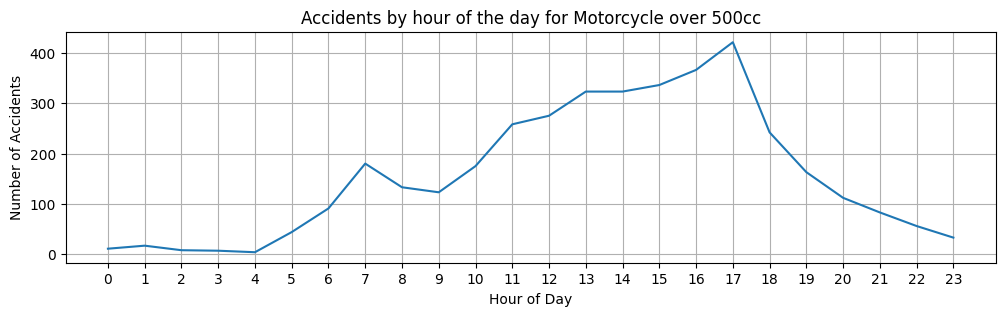

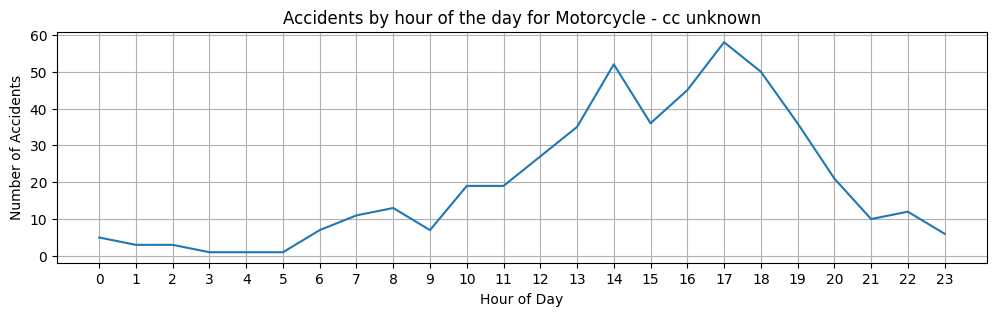

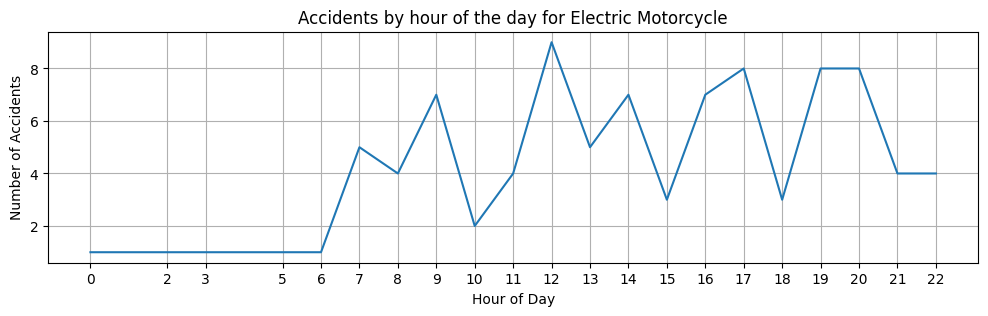

In [166]:
for i in motorbikes:
    motorbike_accidents_type= motorbike_accidents[motorbike_accidents['vehicle_type']== i].copy()
    
    motorbike_accidents_type['hour'] = motorbike_accidents_type['datetime'].dt.hour
    motorbike_accidents_type=motorbike_accidents_type['hour'].value_counts()
    # motorbike_accidents_type = motorbike_accidents_type.groupby('hour')['accident_index'].count()
    plt.figure(figsize=(12, 3))
    sns.lineplot(x= motorbike_accidents_type.index, y= motorbike_accidents_type.values)
    plt.xticks(ticks=motorbike_accidents_type.index) 
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Accidents')
    plt.title(f'Accidents by hour of the day for {vehicle_types[i]}')
    plt.grid(True)
    plt.show()


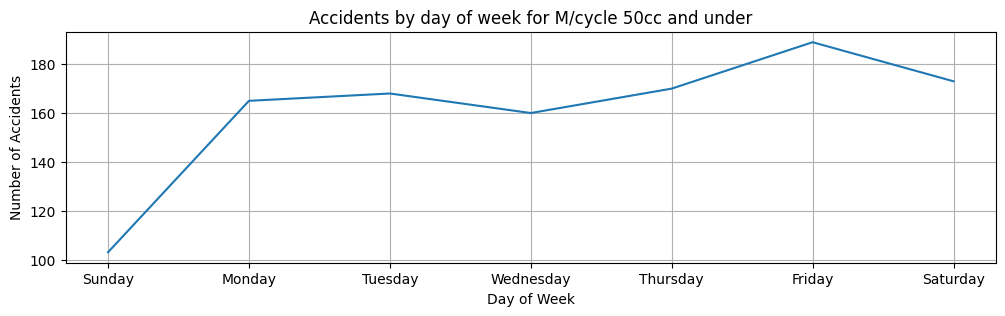

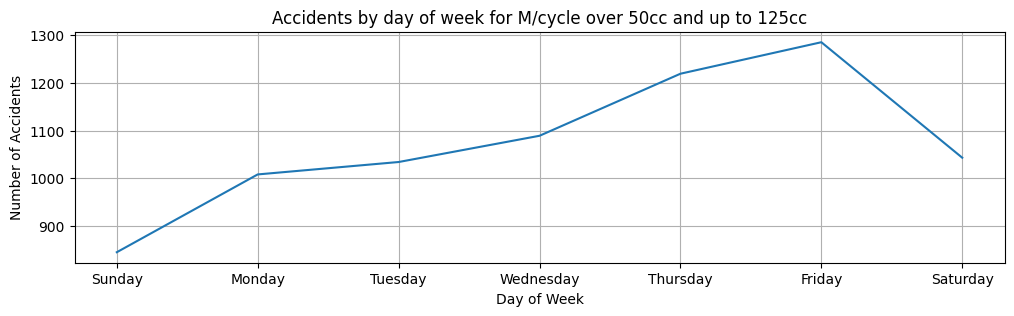

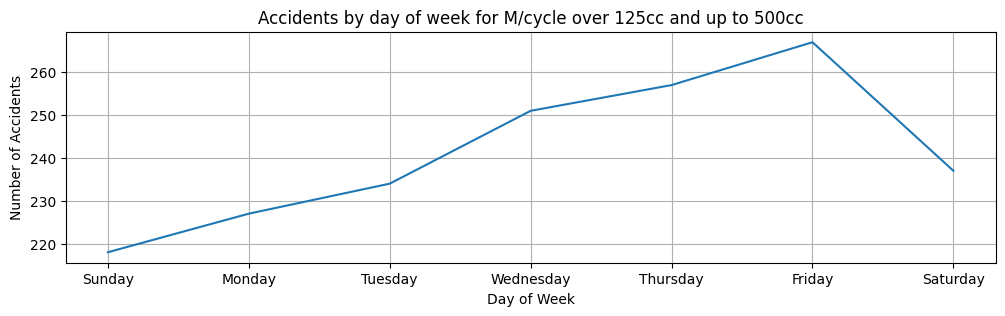

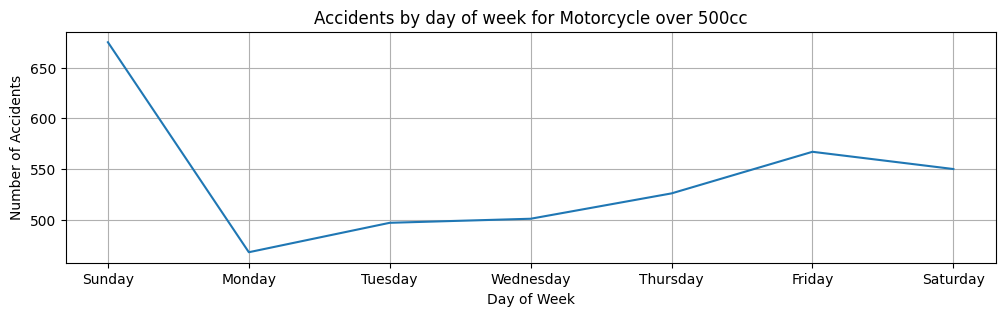

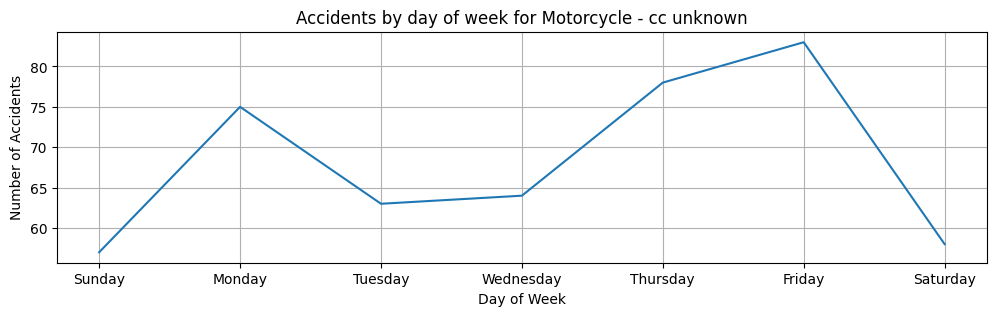

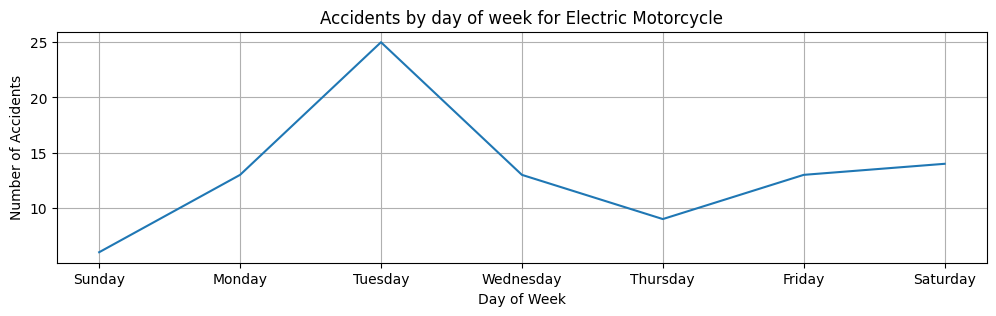

In [167]:
for i in motorbikes:
    motorbike_accidents_type= motorbike_accidents[motorbike_accidents['vehicle_type']== i].copy()
    
    #motorbike_accidents_type['hour'] = motorbike_accidents_type['datetime'].dt.hour
    motorbike_accidents_type=motorbike_accidents_type['day_of_week'].value_counts()
    # motorbike_accidents_type = motorbike_accidents_type.groupby('hour')['accident_index'].count()
    plt.figure(figsize=(12, 3))
    sns.lineplot(x= motorbike_accidents_type.index, y= motorbike_accidents_type.values)
    plt.xticks(ticks=range(1,8), labels=days) 
    
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Accidents')
    plt.title(f'Accidents by day of week for {vehicle_types[i]}')
    plt.grid(True)
    plt.show()

In [136]:
motorbike_accidents['accident_severity'].value_counts()

accident_severity
3    9970
2    4415
1     312
Name: count, dtype: int64

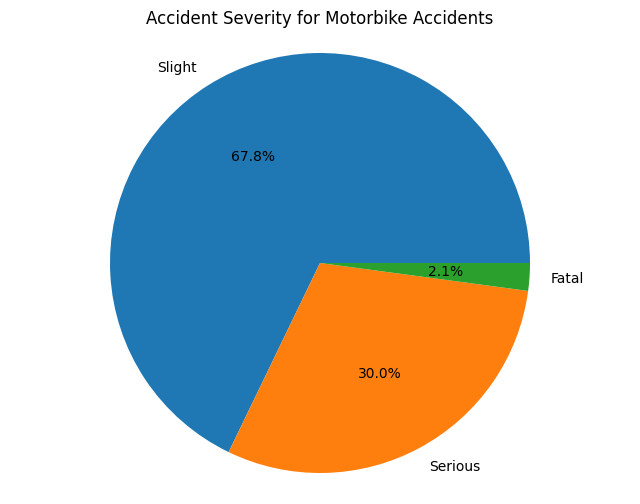

In [137]:
# Analyze accident severity
severity_dist = motorbike_accidents['accident_severity'].value_counts()

# Define labels for the pie chart
labels = ['Slight', 'Serious', 'Fatal']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(severity_dist, labels=labels, autopct='%1.1f%%')
plt.title('Accident Severity for Motorbike Accidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

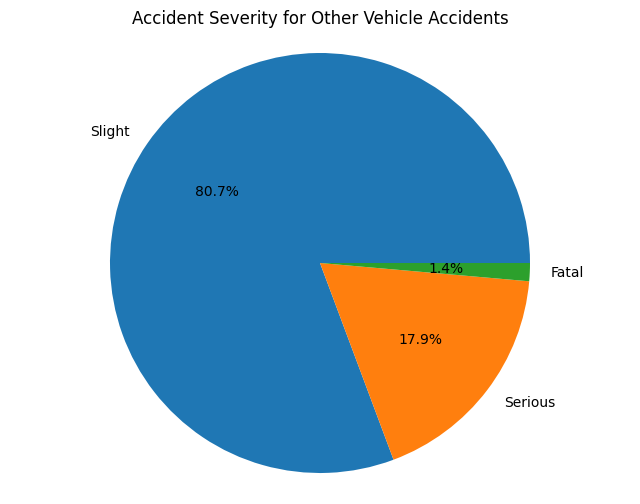

In [138]:
otherveh_accidents = accident_vehicles[~accident_vehicles['vehicle_type'].isin(motorbikes)]
# Analyze accident severity
severity_dist = otherveh_accidents['accident_severity'].value_counts()

# Define labels for the pie chart
labels = ['Slight', 'Serious', 'Fatal']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(severity_dist, labels=labels, autopct='%1.1f%%')
plt.title('Accident Severity for Other Vehicle Accidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


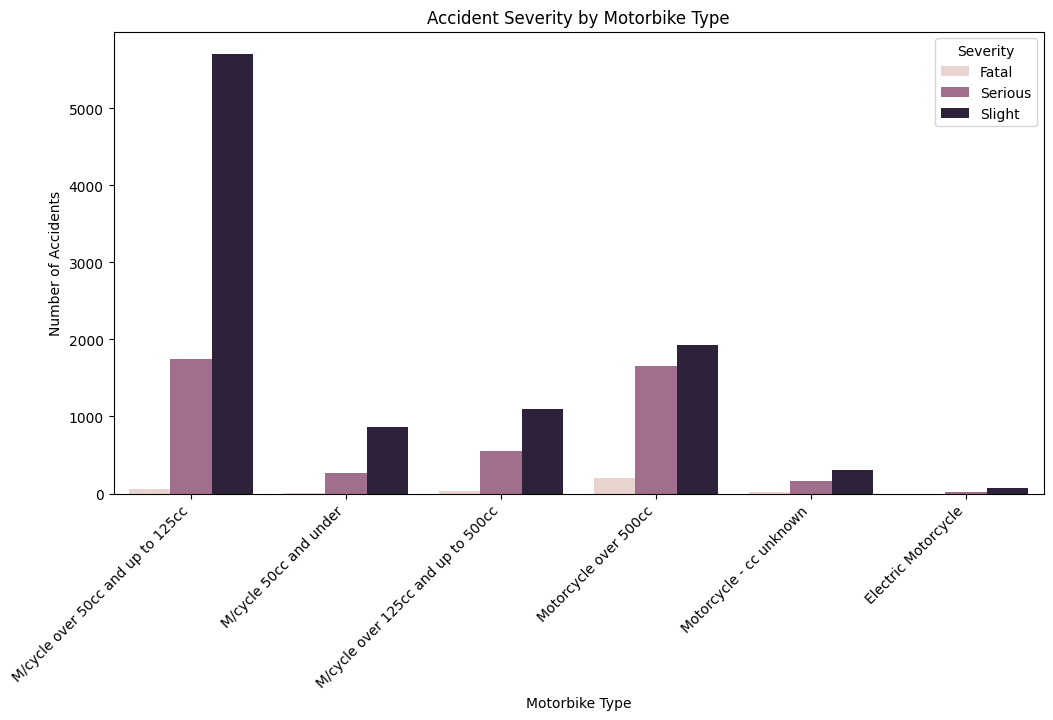

In [139]:
# Severity distribution by speed limit
motorbike_type_acc=motorbike_accidents.copy()

motorbike_type_acc['vehicle_type'] = motorbike_type_acc['vehicle_type'].map(vehicle_types)
plt.figure(figsize=(12, 6))
sns.countplot(data=motorbike_type_acc, x='vehicle_type', hue='accident_severity')
plt.title('Accident Severity by Motorbike Type')
plt.xlabel('Motorbike Type')
plt.ylabel('Number of Accidents')
legend_labels = ['Fatal', 'Serious', 'Slight']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Severity')
plt.xticks(rotation=45,ha='right')
plt.show()

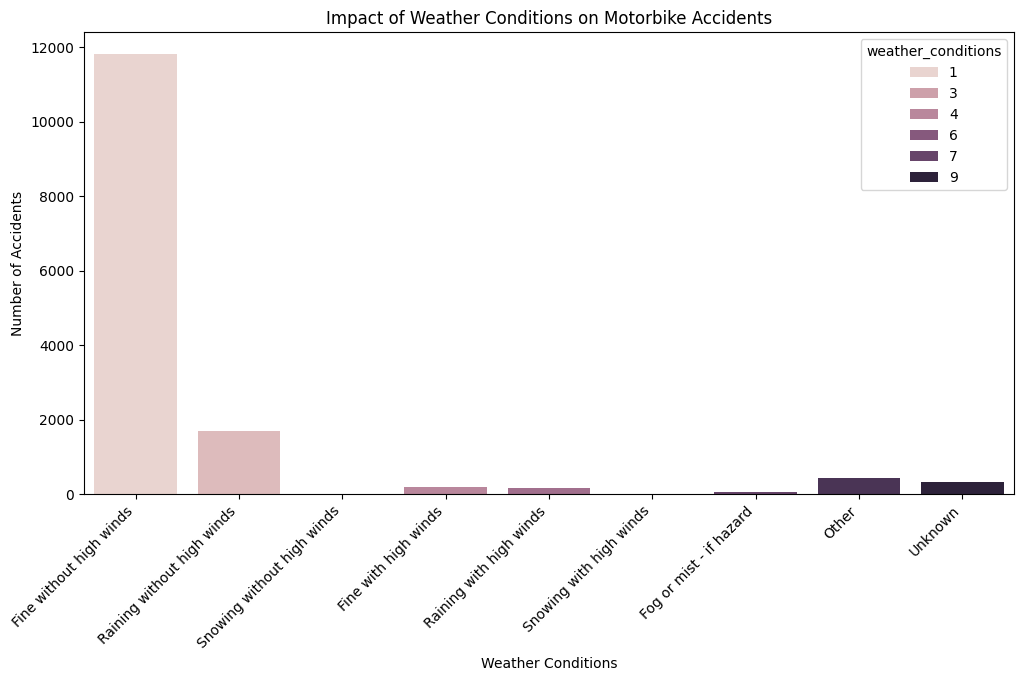

In [140]:
filtered_data = motorbike_accidents[motorbike_accidents['weather_conditions'] != -1]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='weather_conditions', hue='weather_conditions')
plt.title('Impact of Weather Conditions on Motorbike Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
weather_conditions = ['Fine without high winds', 'Raining without high winds', 'Snowing without high winds', 'Fine with high winds', 'Raining with high winds', 'Snowing with high winds', 'Fog or mist - if hazard', 'Other', 'Unknown']
labels = list(range(9))
plt.xticks(labels, weather_conditions, rotation=45, ha='right')
plt.show()

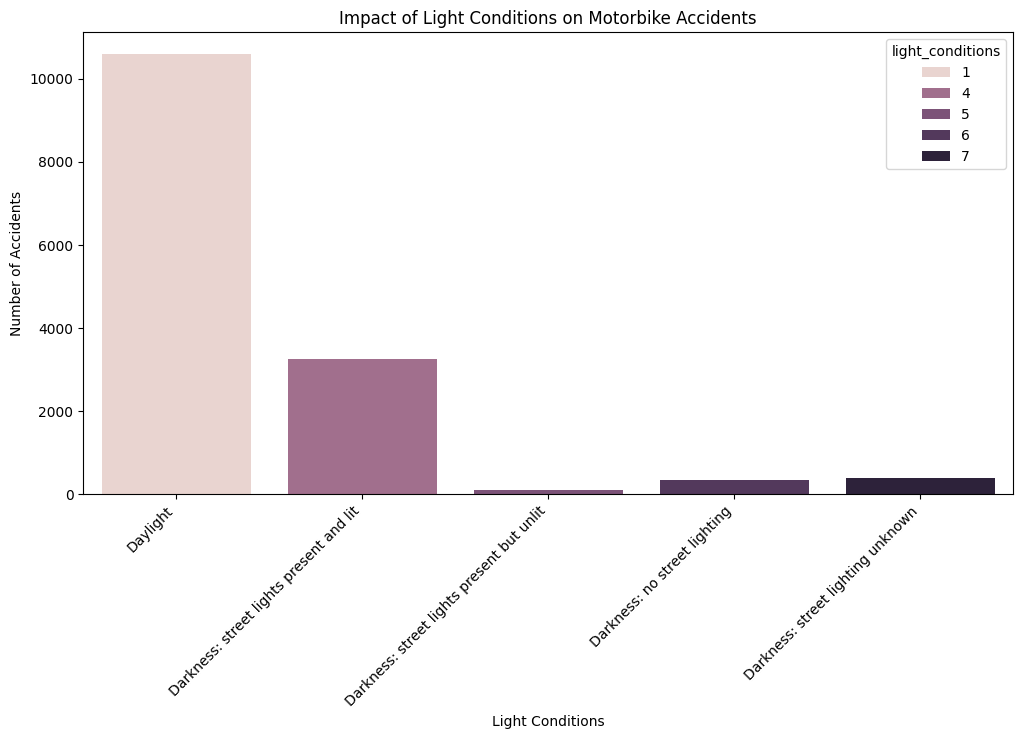

In [141]:
filtered_data = motorbike_accidents[motorbike_accidents['light_conditions'] != -1]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='light_conditions', hue='light_conditions')
plt.title('Impact of Light Conditions on Motorbike Accidents')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
light_conditions = ['Daylight', 'Darkness: street lights present and lit', 'Darkness: street lights present but unlit', 'Darkness: no street lighting', 'Darkness: street lighting unknown']
labels = list(range(5))
plt.xticks(labels, light_conditions, rotation=45, ha='right')

plt.show()

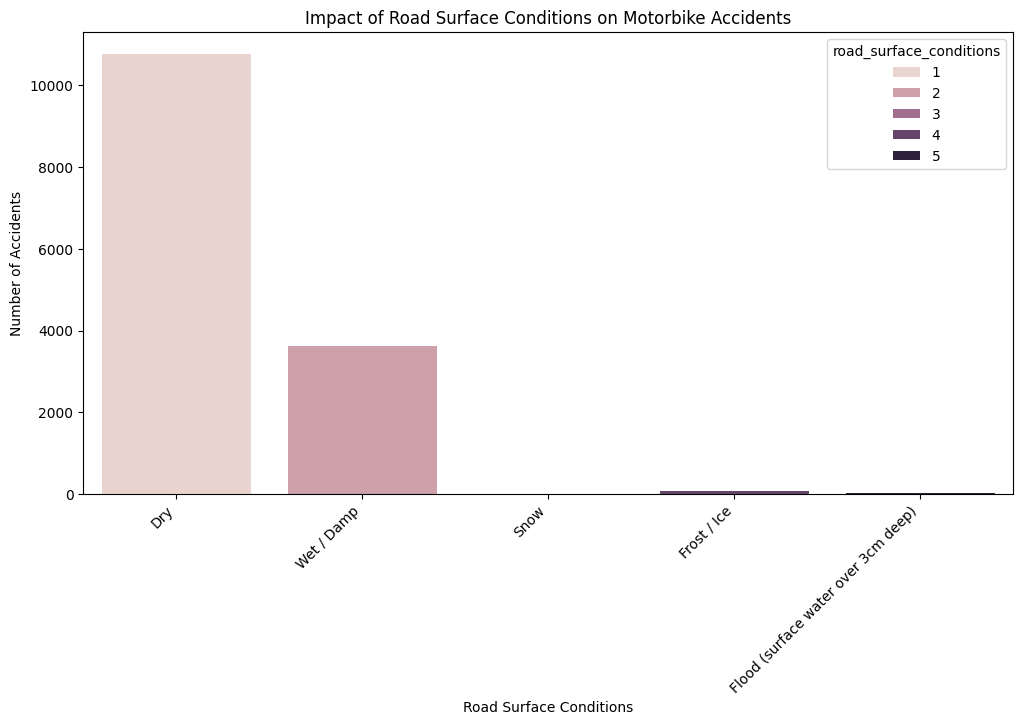

In [142]:
filtered_data =  motorbike_accidents[(motorbike_accidents['road_surface_conditions'] != -1) & (motorbike_accidents['road_surface_conditions'] != 9)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='road_surface_conditions', hue ='road_surface_conditions')
plt.title('Impact of Road Surface Conditions on Motorbike Accidents')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
road_surface_condition = ['Dry', 'Wet / Damp', 'Snow', 'Frost / Ice', 'Flood (surface water over 3cm deep)']
labels = list(range(len(road_surface_condition)))
plt.xticks(labels, road_surface_condition, rotation=45, ha='right')

plt.show()

### Insights:

<li>Severity Distribution: Motorbike accidents had a higher proportion of serious and fatal injuries compared to other vehicle types.
<li>Moorbike Accidents peaked at 5pm for all motorbike types except electric motorbikes

<li>Motorbike Categories: M/cycle over 50cc and up to 125cc had highest number of accidents



##  Specific Analysis: Pedestrian Accidents

In [143]:
casualty_accident = pd.merge(accident, casualty, on='accident_index')

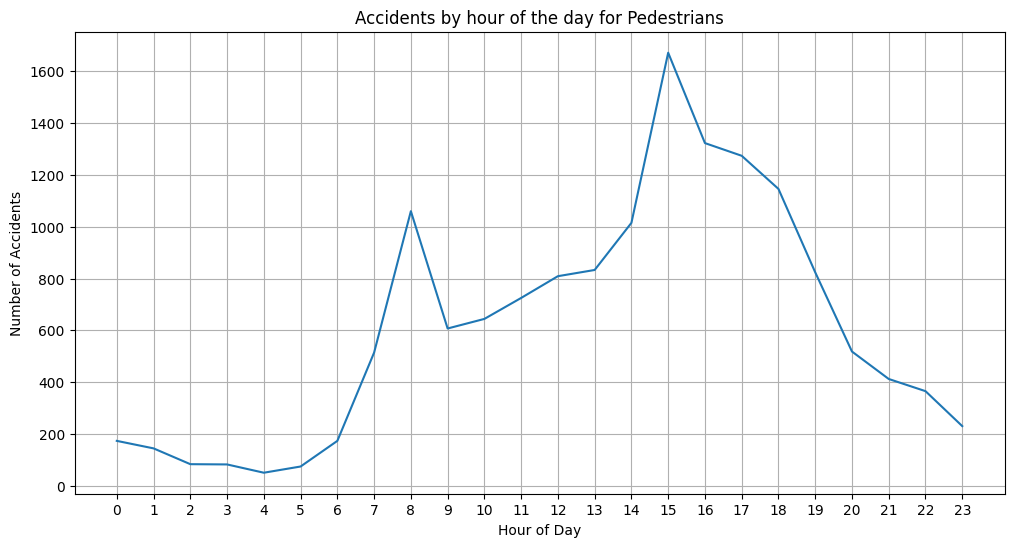

In [144]:
pedestrian_accidents = casualty_accident[casualty_accident['casualty_class']==3].copy()

pedestrian_accidents['hour'] = pedestrian_accidents['datetime'].dt.hour
pedestrian_accidents=pedestrian_accidents['hour'].value_counts()
# motorbike_accidents_type = motorbike_accidents_type.groupby('hour')['accident_index'].count()
plt.figure(figsize=(12, 6))
sns.lineplot(x= pedestrian_accidents.index, y= pedestrian_accidents.values)
plt.xticks(ticks=pedestrian_accidents.index) 
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title(f'Accidents by hour of the day for Pedestrians')
plt.grid(True)
plt.show()

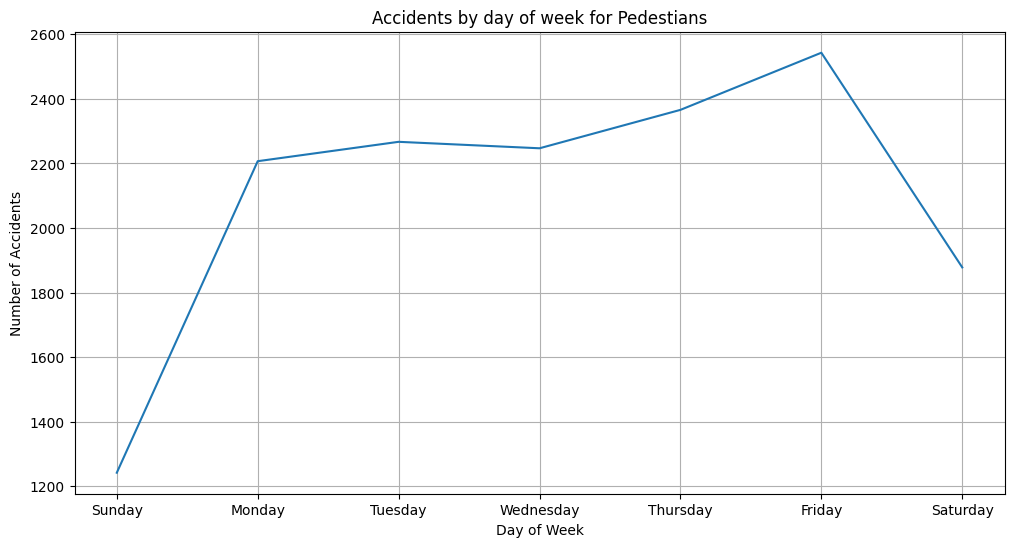

In [145]:
pedestrian_accidents = casualty_accident[casualty_accident['casualty_class']==3].copy()

pedestrian_accidents=pedestrian_accidents['day_of_week'].value_counts()
plt.figure(figsize=(12, 6))
sns.lineplot(x= pedestrian_accidents.index, y= pedestrian_accidents.values)
plt.xticks(ticks=range(1,8), labels=days) 

plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title(f'Accidents by day of week for Pedestians')
plt.grid(True)
plt.show()

In [146]:
pedestrian_location_dist = casualty[(casualty['pedestrian_location'] != -1) & (casualty['pedestrian_location'] != 0)].copy()


# Define a mapping for pedestrian location types
pedestrian_location_types = {
    1: 'In carriageway, crossing on pedestrian crossing facility',
    2: 'In carriageway, crossing within zig-zag lines at crossing approach',
    3: 'In carriageway, crossing within zig-zag lines at crossing exit',
    4: 'In carriageway, crossing elsewhere within 50m of pedestrian crossing',
    5: 'In carriageway, crossing elsewhere',
    6: 'On footway or verge',
    7: 'On refuge, central island or central reservation',
    8: 'In centre of carriageway, not on refuge, island or central reservation',
    9: 'In carriageway, not crossing',
    10: 'Unknown or other'
}

# Map the pedestrian location types to their descriptions
pedestrian_location_dist['pedestrian_location'] = pedestrian_location_dist['pedestrian_location'].map(pedestrian_location_types)

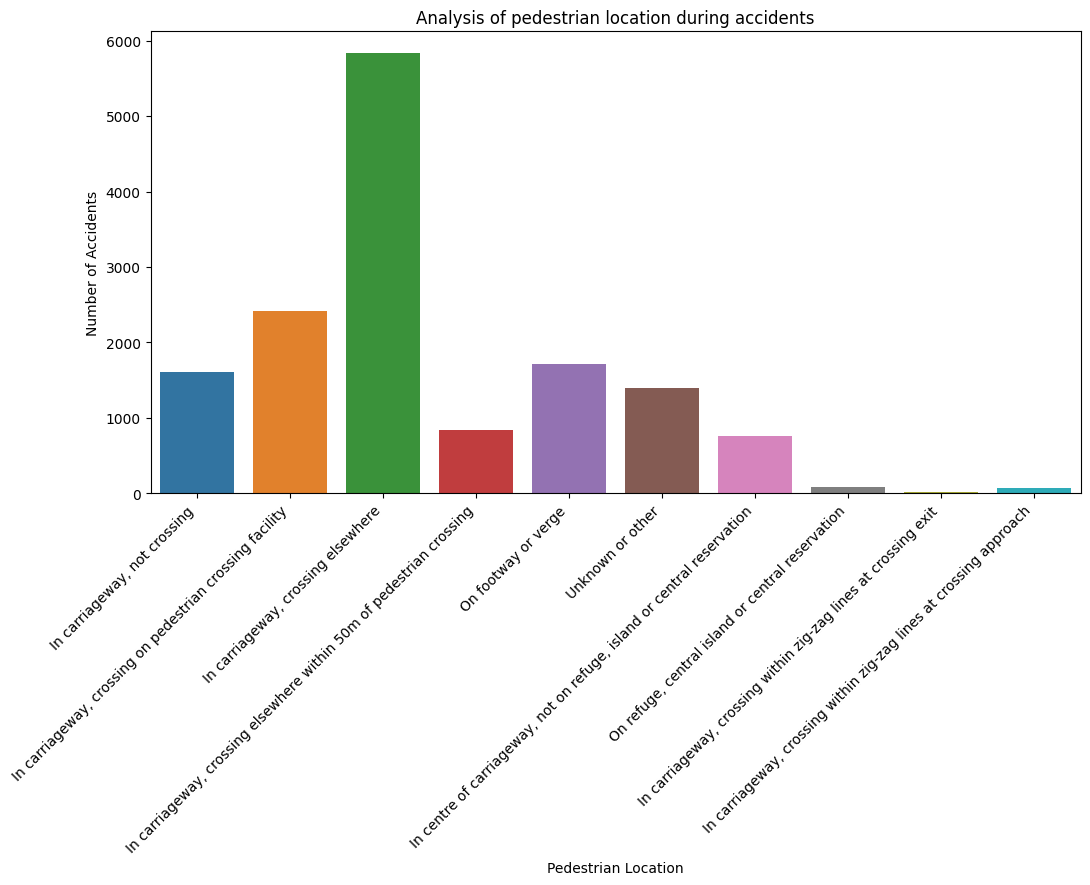

In [147]:


#filtered_data =  motorbike_accidents[(motorbike_accidents['road_surface_conditions'] != -1) & (motorbike_accidents['road_surface_conditions'] != 0)]

plt.figure(figsize=(12, 6))
sns.countplot(data=pedestrian_location_dist, x='pedestrian_location', hue = 'pedestrian_location')
plt.title('Analysis of pedestrian location during accidents')
plt.xlabel('Pedestrian Location')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45, ha='right')

plt.show()

In [148]:
pedestrian_movement_dist = casualty[(casualty['pedestrian_movement'] != -1) & (casualty['pedestrian_movement'] != 0)].copy()
pedestrian_movement_types = {
    1: 'Crossing from driver\'s nearside',
    2: 'Crossing from driver\'s nearside - masked by parked or stationary vehicle',
    3: 'Crossing from driver\'s offside',
    4: 'Crossing from driver\'s offside - masked by parked or stationary vehicle',
    5: 'In carriageway, stationary - not crossing (standing or playing)',
    6: 'In carriageway, stationary - not crossing (standing or playing), masked by parked or stationary vehicle',
    7: 'Walking along in carriageway - facing traffic',
    8: 'Walking along in carriageway - back to traffic',
    9: 'Unknown or other'
}

# Map the pedestrian movement types to their descriptions
pedestrian_movement_dist['pedestrian_movement'] = pedestrian_movement_dist['pedestrian_movement'].map(pedestrian_movement_types)

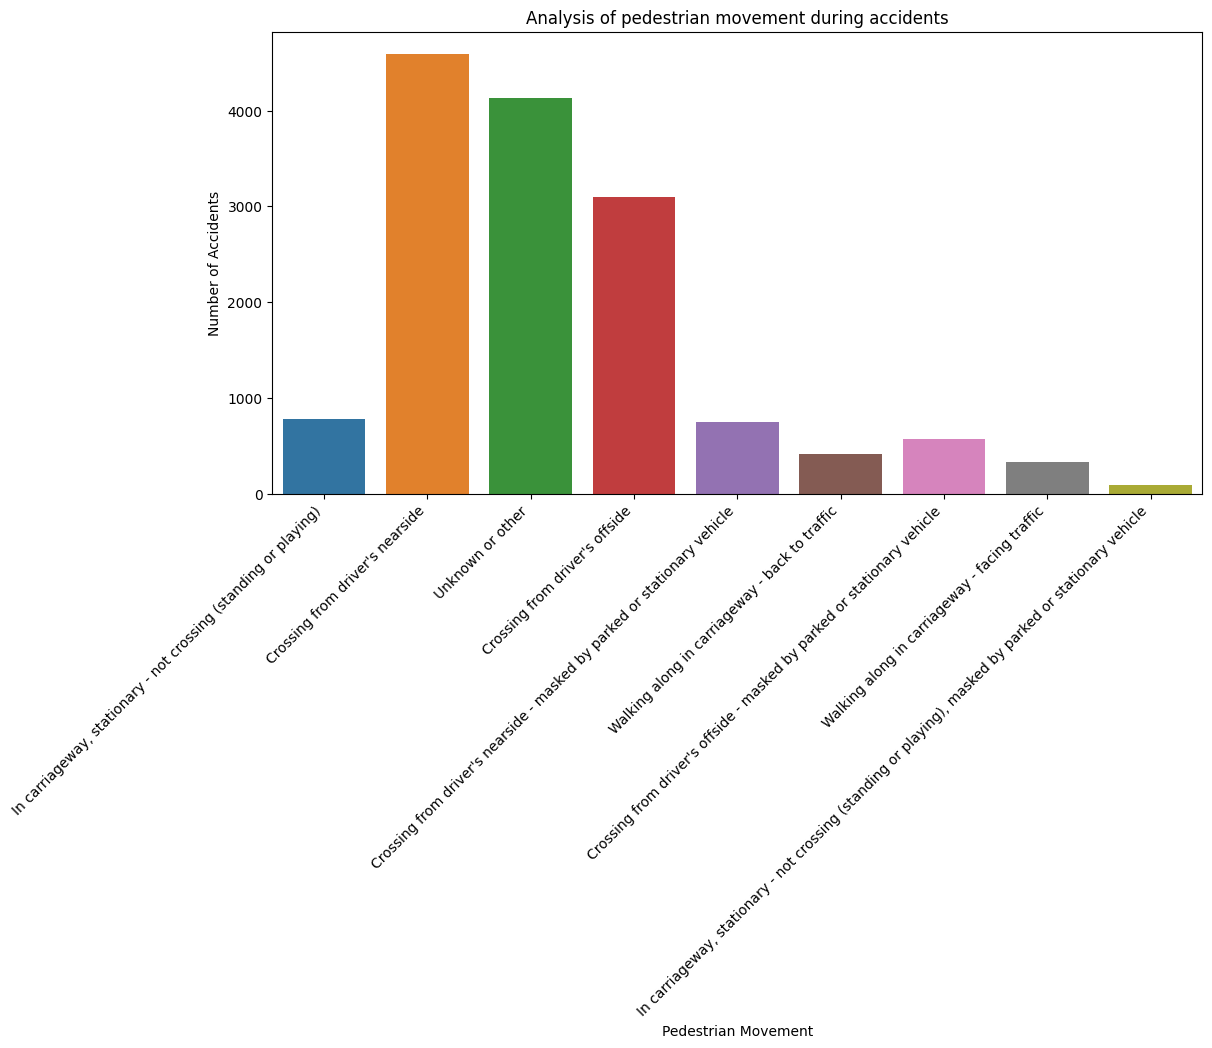

In [149]:



plt.figure(figsize=(12, 6))
sns.countplot(data=pedestrian_movement_dist, x='pedestrian_movement', hue = 'pedestrian_movement')
plt.title('Analysis of pedestrian movement during accidents')
plt.xlabel('Pedestrian Movement')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45, ha='right')

plt.show()

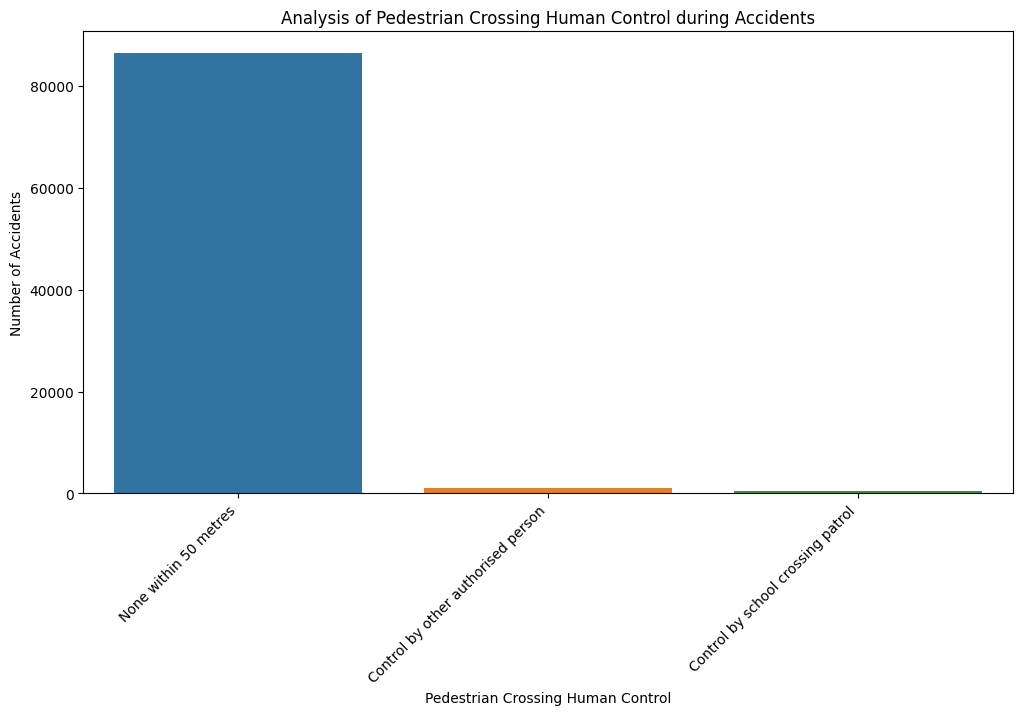

In [150]:
pedestrian_human_control_dist = accident[(accident['pedestrian_crossing_human_control'] != -1) & (accident['pedestrian_crossing_human_control'] != 9)].copy()

# Define a mapping for pedestrian crossing human control types
pedestrian_human_control_types = {
    0: 'None within 50 metres',
    1: 'Control by school crossing patrol',
    2: 'Control by other authorised person'
}

# Map the pedestrian crossing human control types to their descriptions
pedestrian_human_control_dist['pedestrian_crossing_human_control'] = pedestrian_human_control_dist['pedestrian_crossing_human_control'].map(pedestrian_human_control_types)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=pedestrian_human_control_dist, x='pedestrian_crossing_human_control', hue='pedestrian_crossing_human_control')
plt.title('Analysis of Pedestrian Crossing Human Control during Accidents')
plt.xlabel('Pedestrian Crossing Human Control')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

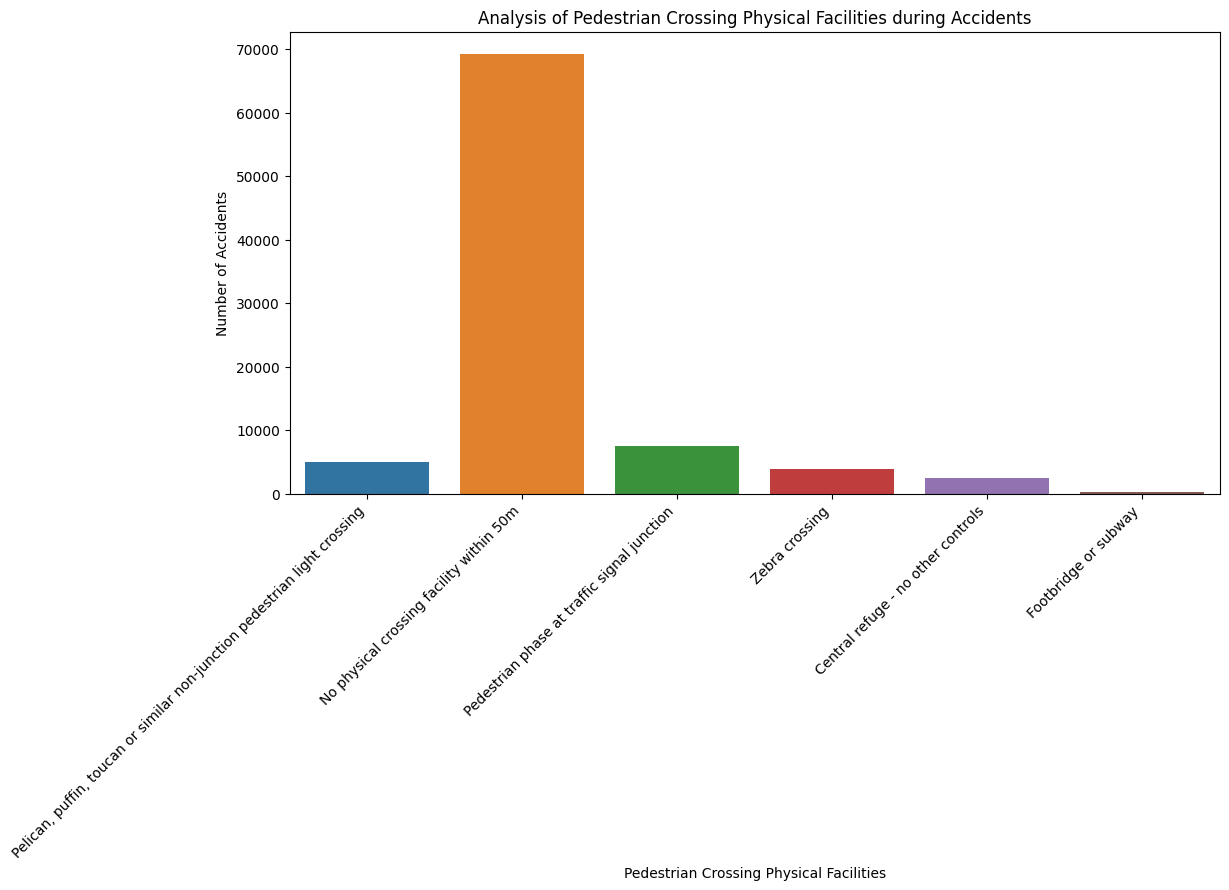

In [151]:
pedestrian_physical_facilities_dist = accident[(accident['pedestrian_crossing_physical_facilities'] != -1) & (accident['pedestrian_crossing_physical_facilities'] != 9)].copy()

pedestrian_physical_facilities_types = {
    0: 'No physical crossing facility within 50m',
    1: 'Zebra crossing',
    4: 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
    5: 'Pedestrian phase at traffic signal junction',
    7: 'Footbridge or subway',
    8: 'Central refuge - no other controls'
}

# Map the pedestrian crossing physical facilities types to their descriptions
pedestrian_physical_facilities_dist['pedestrian_crossing_physical_facilities'] = pedestrian_physical_facilities_dist['pedestrian_crossing_physical_facilities'].map(pedestrian_physical_facilities_types)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=pedestrian_physical_facilities_dist, x='pedestrian_crossing_physical_facilities', hue= 'pedestrian_crossing_physical_facilities')
plt.title('Analysis of Pedestrian Crossing Physical Facilities during Accidents')
plt.xlabel('Pedestrian Crossing Physical Facilities')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


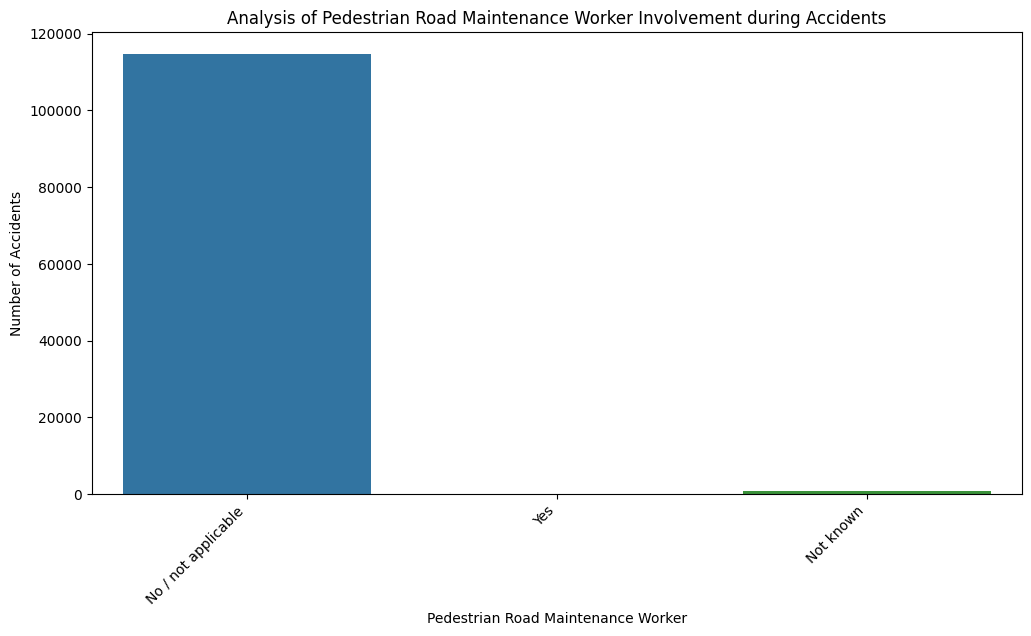

In [152]:
# Filter out invalid pedestrian road maintenance worker values
pedestrian_maintenance_worker_dist = casualty[casualty['pedestrian_road_maintenance_worker'] != -1].copy()

# Define a mapping for pedestrian road maintenance worker types
pedestrian_maintenance_worker_types = {
    0: 'No / not applicable',
    1: 'Yes',
    2: 'Not known'
}

# Map the pedestrian road maintenance worker types to their descriptions
pedestrian_maintenance_worker_dist['pedestrian_road_maintenance_worker'] = pedestrian_maintenance_worker_dist['pedestrian_road_maintenance_worker'].map(pedestrian_maintenance_worker_types)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=pedestrian_maintenance_worker_dist, x='pedestrian_road_maintenance_worker', hue = 'pedestrian_road_maintenance_worker')
plt.title('Analysis of Pedestrian Road Maintenance Worker Involvement during Accidents')
plt.xlabel('Pedestrian Road Maintenance Worker')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


### Insights:

<li>Pedestrian Movement: Crossing from the driver's nearside was the most common movement leading to pedestrian accidents.
<li>Crossing Controls: Lack of pedestrian crossing facilities or human control significantly contributed to accidents.
<li>Absence of Pedestian Road maintenance workers is correlated with more accidents.


## Analysis of External Factors

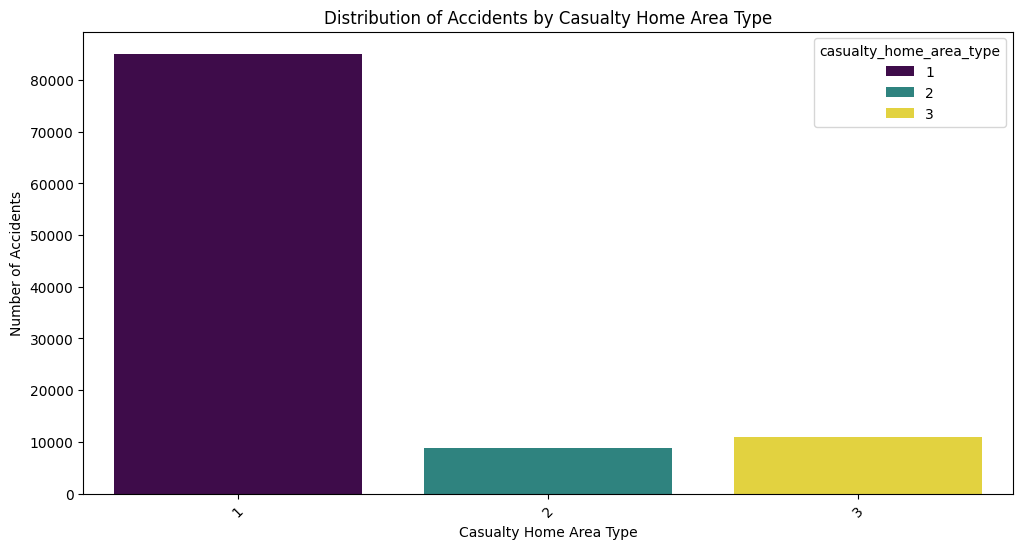

In [153]:
casualty_home_area_dist = casualty[casualty['casualty_home_area_type'] != -1].copy()
casualty_home_area_dist = casualty_home_area_dist['casualty_home_area_type'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=casualty_home_area_dist.index, y=casualty_home_area_dist.values, palette='viridis', hue=casualty_home_area_dist.index)
plt.xlabel('Casualty Home Area Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Casualty Home Area Type')
plt.xticks(rotation=45)
plt.show()

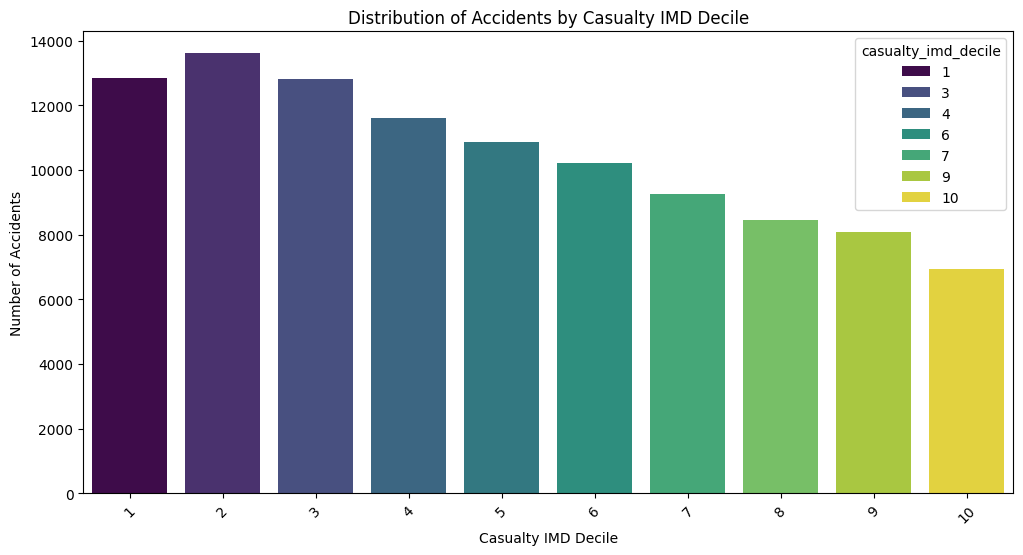

In [154]:
# Distribution of accidents by casualty IMD decile
casualty_imd_decile_dist = casualty[casualty['casualty_imd_decile'] != -1].copy()

casualty_imd_decile_dist = casualty_imd_decile_dist['casualty_imd_decile'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=casualty_imd_decile_dist.index, y=casualty_imd_decile_dist.values, hue= casualty_imd_decile_dist.index, palette='viridis')
plt.xlabel('Casualty IMD Decile')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Casualty IMD Decile')
plt.xticks(rotation=45)
plt.show()

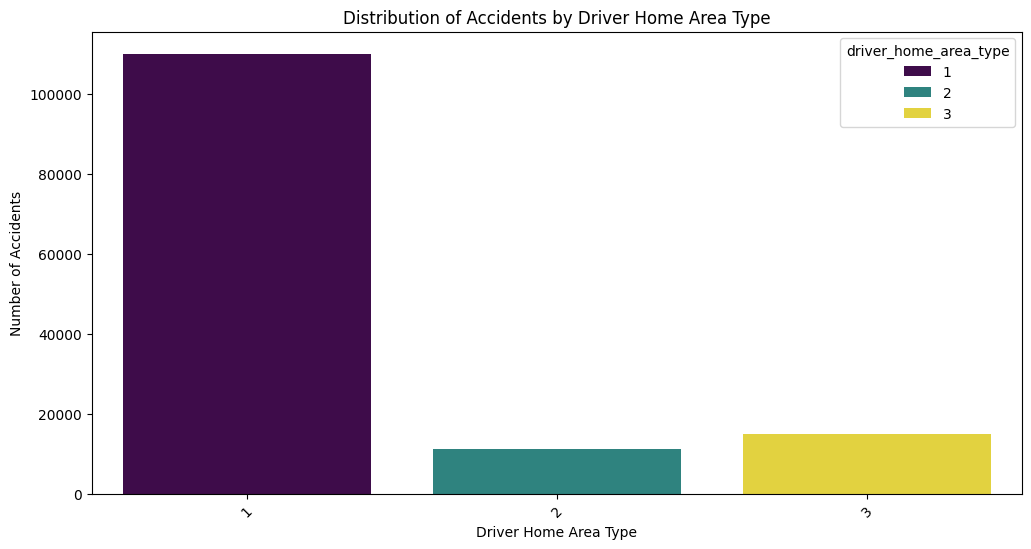

In [155]:

# Distribution of accidents by driver home area type

driver_home_area_dist = vehicle[vehicle['driver_home_area_type'] !=-1].copy()
driver_home_area_dist = driver_home_area_dist['driver_home_area_type'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=driver_home_area_dist.index, y=driver_home_area_dist.values, palette='viridis', hue = driver_home_area_dist.index)
plt.xlabel('Driver Home Area Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Driver Home Area Type')
plt.xticks(rotation=45)
plt.show()

In [156]:
vehicle['driver_imd_decile'].value_counts()

driver_imd_decile
-1     31406
 2     16706
 3     16306
 1     15378
 4     15131
 5     14460
 6     13655
 7     12267
 8     11597
 9     10935
 10     9534
Name: count, dtype: int64

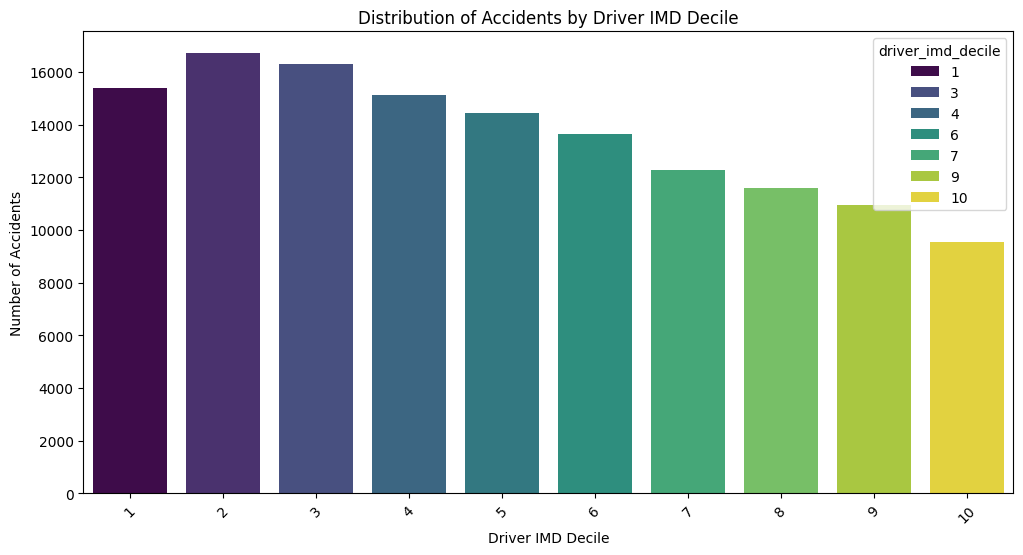

In [157]:
# Distribution of accidents by driver IMD decile
driver_imd_decile_dist = vehicle[vehicle['driver_imd_decile'] != -1].copy()
driver_imd_decile_dist = driver_imd_decile_dist['driver_imd_decile'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=driver_imd_decile_dist.index, y=driver_imd_decile_dist.values, palette='viridis', hue=driver_imd_decile_dist.index)
plt.xlabel('Driver IMD Decile')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Driver IMD Decile')
plt.xticks(rotation=45)
plt.show()

In [158]:


# Calculate correlation between casualty IMD decile and accident severity
casualty_corr = casualty_accident[casualty_accident['casualty_imd_decile'] != -1][['casualty_imd_decile', 'accident_severity']].corr()


# Calculate correlation between driver IMD decile and accident severity
driver_corr = accident_vehicles[accident_vehicles['driver_imd_decile']!= -1][['driver_imd_decile', 'accident_severity']].corr()

print("Correlation between casualty IMD decile and accident severity:")
print(casualty_corr)

print("Correlation between driver IMD decile and accident severity:")
print(driver_corr)


Correlation between casualty IMD decile and accident severity:
                     casualty_imd_decile  accident_severity
casualty_imd_decile             1.000000          -0.041246
accident_severity              -0.041246           1.000000
Correlation between driver IMD decile and accident severity:
                   driver_imd_decile  accident_severity
driver_imd_decile           1.000000          -0.036679
accident_severity          -0.036679           1.000000


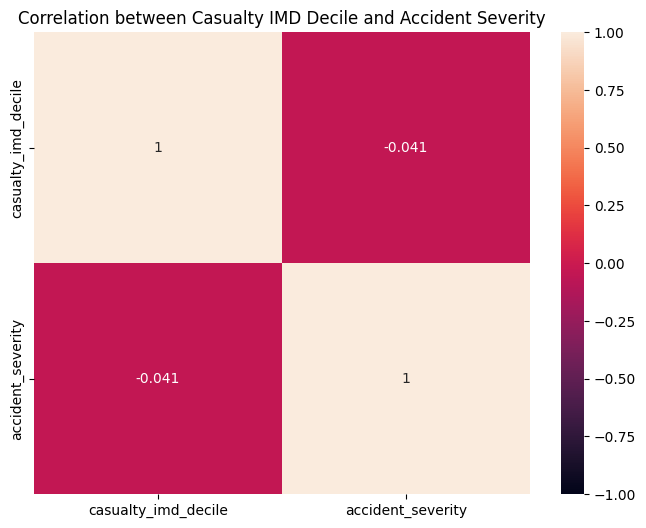

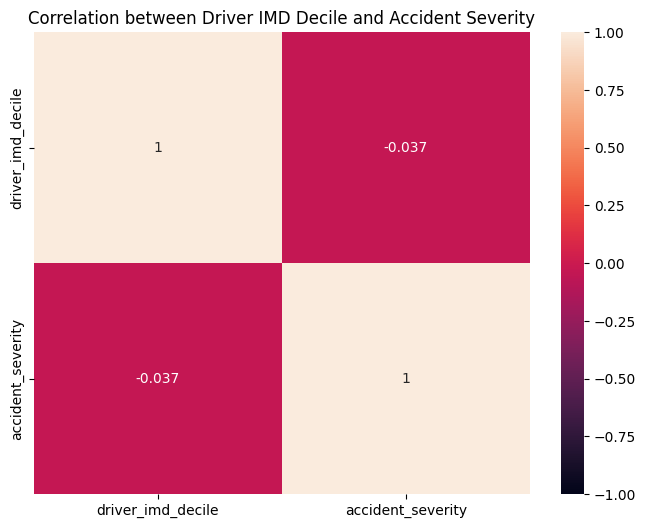

In [159]:
# Plotting correlation heatmap for casualty IMD decile
plt.figure(figsize=(8, 6))
sns.heatmap(casualty_corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Casualty IMD Decile and Accident Severity')
plt.show()

# Plotting correlation heatmap for driver IMD decile
plt.figure(figsize=(8, 6))
sns.heatmap(driver_corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Driver IMD Decile and Accident Severity')
plt.show()

## Insights:

<li>IMD Decile Correlation: Lower-income areas (higher IMD deciles) had higher accident rates and severity, suggesting socioeconomic factors influence road safety.

## Driver and Vehicle Analysis

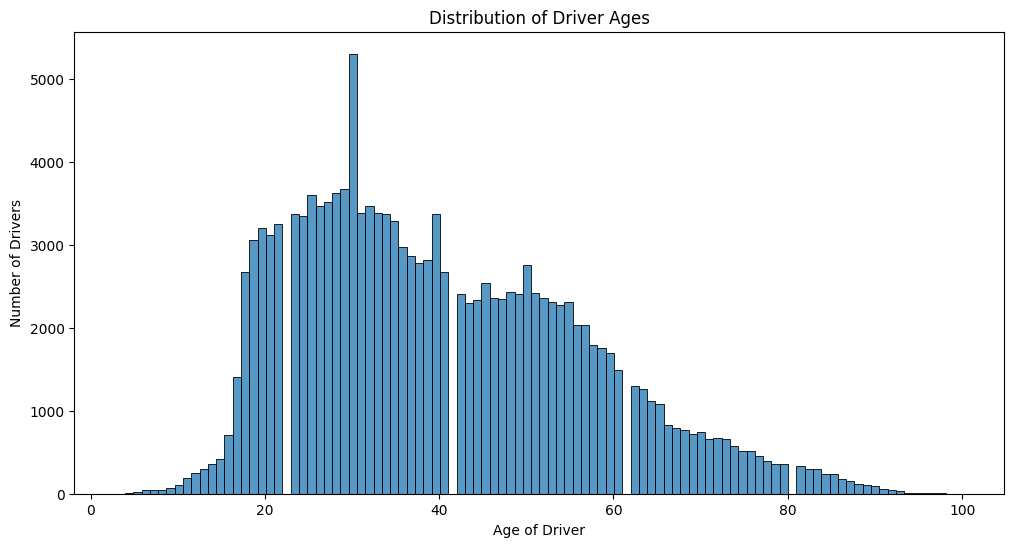

In [160]:
# Filter out invalid age and gender values
driver_age_gender_dist = vehicle[(vehicle['age_of_driver'] != -1) & (vehicle['sex_of_driver'] != -1)].copy()

# Define a mapping for driver gender
driver_gender_types = {
    1: 'Male',
    2: 'Female',
    3: 'Not Known'
}

# Map the driver gender types to their descriptions
driver_age_gender_dist['sex_of_driver'] = driver_age_gender_dist['sex_of_driver'].map(driver_gender_types)

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=driver_age_gender_dist, x='age_of_driver')
plt.title('Distribution of Driver Ages')
plt.xlabel('Age of Driver')
plt.ylabel('Number of Drivers')
plt.show()

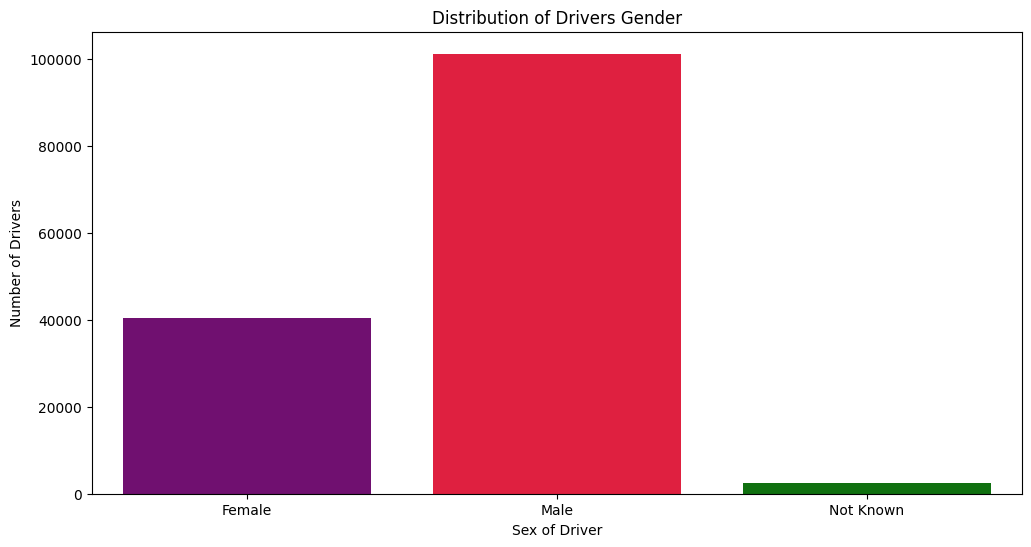

In [161]:
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=driver_age_gender_dist, x='sex_of_driver', hue='sex_of_driver', palette= ['purple','#FF002B', 'green'])
plt.title('Distribution of Drivers Gender')
plt.xlabel('Sex of Driver')
plt.ylabel('Number of Drivers')
plt.show()

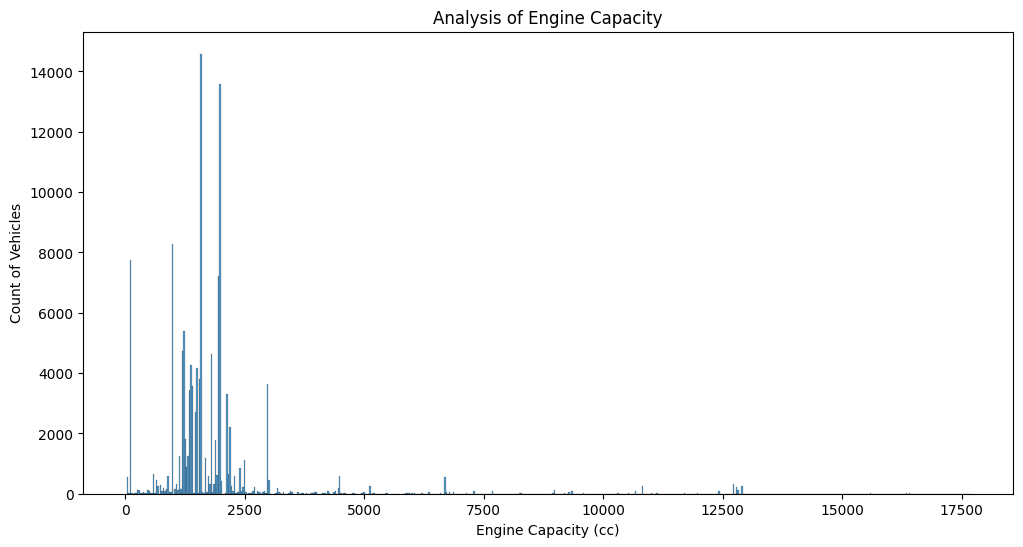

In [162]:
# Filter out invalid engine capacity and vehicle age values
engine_vehicle_age_dist = vehicle[vehicle['engine_capacity_cc'] != -1].copy()



# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=engine_vehicle_age_dist, x='engine_capacity_cc')
plt.title('Analysis of Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Count of Vehicles')
plt.show()

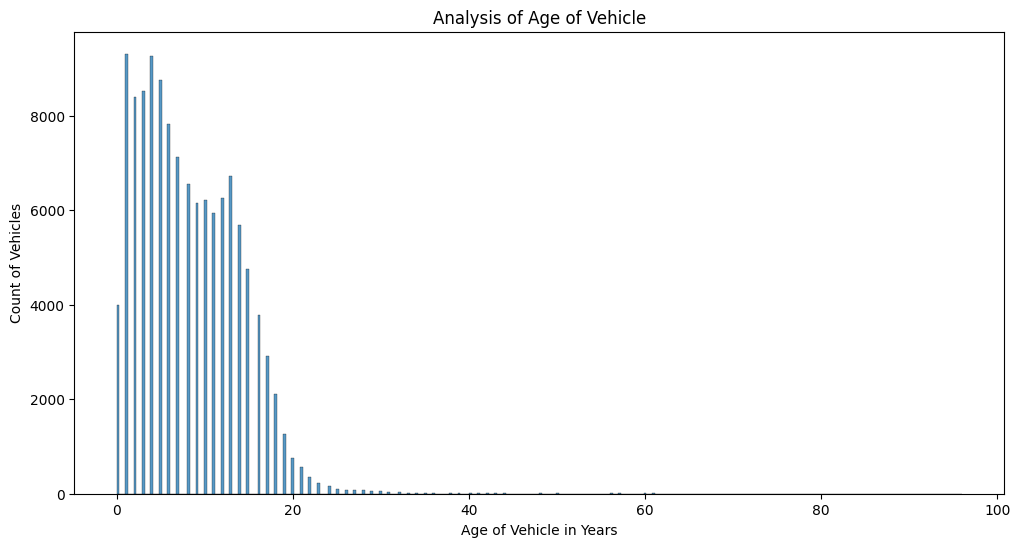

In [163]:
#engine_vehicle_age_count = engine_vehicle_age_dist['age_of_vehicle'].value_counts()
vehicle_age_dist = vehicle[vehicle['age_of_vehicle'] != -1].copy()

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(x='age_of_vehicle', data=vehicle_age_dist)
plt.title('Analysis of Age of Vehicle')
plt.xlabel('Age of Vehicle in Years')
plt.ylabel('Count of Vehicles')
plt.show()



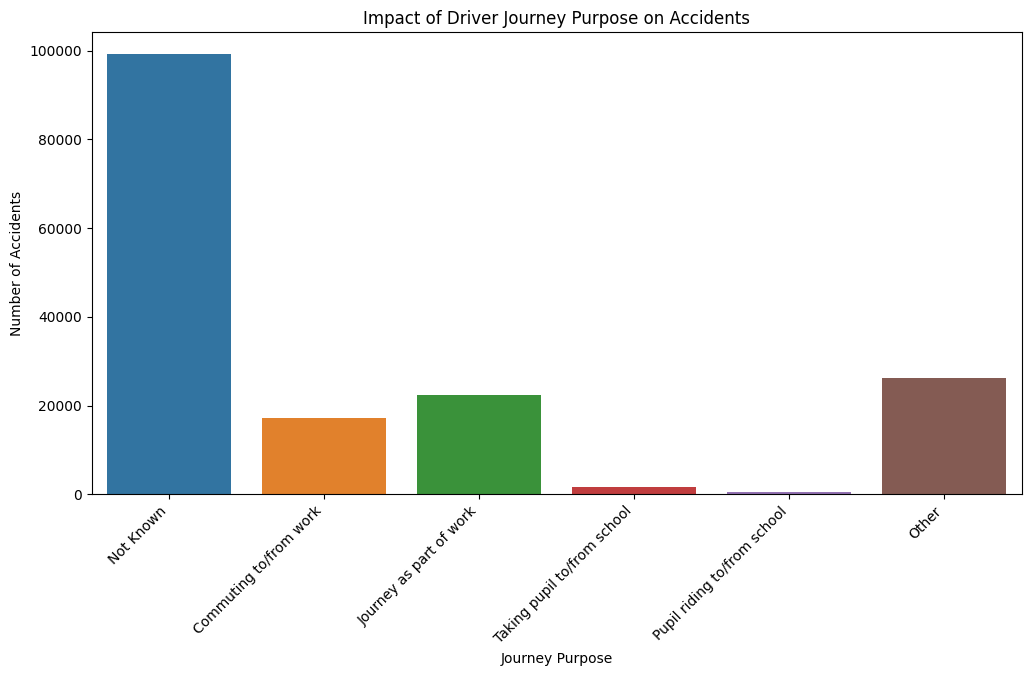

In [164]:
# Filter out invalid journey purpose values
journey_purpose_dist = vehicle[(vehicle['journey_purpose_of_driver'] != -1)].copy()

# Define a mapping for journey purpose
journey_purpose_types = {
    1: 'Journey as part of work',
    2: 'Commuting to/from work',
    3: 'Taking pupil to/from school',
    4: 'Pupil riding to/from school',
    5: 'Other',
    6: 'Not Known'
}

# Map the journey purpose types to their descriptions
journey_purpose_dist['journey_purpose_of_driver'] = journey_purpose_dist['journey_purpose_of_driver'].map(journey_purpose_types)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=journey_purpose_dist, x='journey_purpose_of_driver', hue='journey_purpose_of_driver')
plt.title('Impact of Driver Journey Purpose on Accidents')
plt.xlabel('Journey Purpose')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


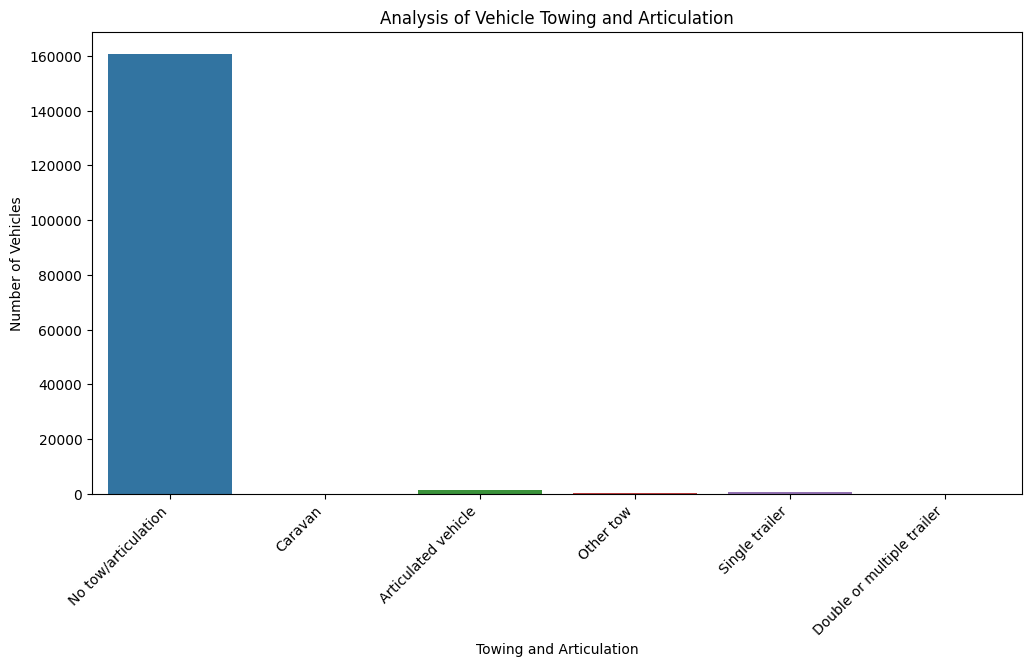

In [165]:
# Filter out invalid towing and articulation values
towing_articulation_dist = vehicle[(vehicle['towing_and_articulation'] != -1) & (vehicle['towing_and_articulation'] != 9)].copy()

# Define a mapping for towing and articulation
towing_articulation_types = {
    0: 'No tow/articulation',
    1: 'Articulated vehicle',
    2: 'Double or multiple trailer',
    3: 'Caravan',
    4: 'Single trailer',
    5: 'Other tow'
}

# Map the towing and articulation types to their descriptions
towing_articulation_dist['towing_and_articulation'] = towing_articulation_dist['towing_and_articulation'].map(towing_articulation_types)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=towing_articulation_dist, x='towing_and_articulation', hue='towing_and_articulation')
plt.title('Analysis of Vehicle Towing and Articulation')
plt.xlabel('Towing and Articulation')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


### Insights



<li>Driver Characteristics: Young male drivers were more frequently involved in accidents. Drivers on work-related journeys had a higher accident rate.

<li>Vehicle Characteristics: Vehicles with smaller engine capacities were more prone to severe accidents.

## Insights and Recommendations

<li>Improve Road Safety in Urban Areas: Targeted interventions in high-accident urban areas, particularly London and South East regions.
<li>Enhance Pedestrian Safety: Implement more pedestrian crossings and controls, especially in high-traffic areas.
<li>Focus on Young Drivers: Educational campaigns and stricter enforcement for younger drivers to reduce accident rates.
<li>Improve Vehicle Safety: Encourage regular vehicle maintenance and checks.
<li>Address Socioeconomic Disparities: Implement policies aimed at improving road safety in lower-income areas.
<li>Enhance Lighting and Road Conditions: Improve street lighting and maintain road surfaces to reduce accident severity in poor conditions.
<li>Commuting Patterns: The rush hour peaks indicate a clear need for targeted measures during these times.

In [133]:
#df['vehicle_reference_y'].equals(df['vehicle_reference_x'])
# assert df['vehicle_reference_y'] == df['vehicle_reference_x']
# (df['vehicle_reference_y'] == df['vehicle_reference_x']).all()
# comparison = df['vehicle_reference_y'].compare(df['vehicle_reference_x'])
# comparison = df['vehicle_reference_y'].isin(df['vehicle_reference_x'])
# comparison = np.where(df['vehicle_reference_y'] == df['vehicle_reference_x'], True, False)
# df[df['accident_reference'] != df['accident_reference_x']].head() 